**Author**: **Ammar Waddah**

# Kaggle Promotes

**Kaggle**

In [ ]:
# Install kaggle packages.
!pip install kaggle

In [ ]:
# Create kaggle dir.
!mkdir -p ~/.kaggle/

In [ ]:
# Move 'kaggle.json' into the folder where the API expects to find it.
!mv kaggle.json ~/.kaggle/

In [ ]:
# Change permissions so that only me can read and write.
!chmod 600 ~/.kaggle/kaggle.json

**Kaggle dataset preperation**

In [ ]:
# Download kaggle competition dataset.
!kaggle competitions download -c shai-training-2023-a-level-2

 35% 9.00M/25.7M [00:00<00:00, 24.7MB/s]
100% 25.7M/25.7M [00:00<00:00, 57.7MB/s]


In [ ]:
# Print downloaded files.
!ls

sample_data  shai-training-2023-a-level-2.zip


In [ ]:
# Unzip the dataset file.
!unzip shai-training-2023-a-level-2.zip

Archive:  shai-training-2023-a-level-2.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: Valid.csv               
  inflating: sample_submission.csv   


In [ ]:
# Print unzipped files.
!ls

sample_data	       shai-training-2023-a-level-2.zip  Train.csv
sample_submission.csv  Test.csv				 Valid.csv


# Import Dependencies

**Solving local encoding issue**

In [ ]:
# import locale
# print(locale.getpreferredencoding(), locale.getdefaultlocale())

In [ ]:
# locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# print(locale.getpreferredencoding(), locale.getdefaultlocale())

In [ ]:
# Auto select the best hypertuning parameters
!git clone https://github.com/WittmannF/LRFinder.git
from LRFinder.keras_callback import LRFinder

In [ ]:
!pip install swifter

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
import swifter
import math
import random
import copy
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Iterators
import collections
from collections import Counter
from itertools import cycle
import pickle
import os

In [ ]:
# Cleaning data
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
from datetime import datetime
import string
from string import punctuation
# Dealing with text data
import spacy
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.models import Word2Vec
# Ensembles
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, StackingClassifier
# Classifiers # Sklearn
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier
from sklearn.utils import resample
import joblib

In [ ]:
# Tuning and Evaluation
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, HalvingGridSearchCV, learning_curve, cross_val_predict

In [ ]:
# Metrics
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, precision_score,accuracy_score, recall_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Tensorflow / Keras / Pytorch libraries packages
import tensorflow as tf
import tensorflow_hub as hub
from keras.optimizers import Adam
import keras # for building Neural Networks
from keras.utils import pad_sequences
from keras.layers import TextVectorization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Model, Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.initializers import TruncatedNormal
from keras.layers import Embedding, GlobalMaxPool1D, BatchNormalization, RepeatVector, Dense, TimeDistributed, Bidirectional, GRU, LSTM, Activation, Conv1D, MaxPool1D, Dropout  # for creating layers inside the Neural Network
from keras.callbacks import EarlyStopping
import torch # Pytorch package

**Complete importing/downloading dependencies**

In [ ]:
# !pip install transformers

In [ ]:
!pip install datasets transformers==4.28.0

In [ ]:
# Transformers models
from transformers import BertTokenizer, BertForSequenceClassification
import transformers
from transformers import TFBertModel, BertConfig, BertTokenizerFast
from transformers import RobertaTokenizer, TFRobertaModel
from transformers import XLNetTokenizer, TFXLNetModel
from transformers import TrainingArguments, Trainer
from transformers import TFAutoModelForSequenceClassification
from transformers import EarlyStoppingCallback

In [ ]:
print("TF version: ", tf.__version__)
print("Hub version: ", hub.__version__)
print("Transformers version: ", transformers.__version__)

TF version:  2.12.0
Hub version:  0.13.0
Transformers version:  4.28.0


In [ ]:
# Config figures
plt.figure(figsize=(16,7))
plt.style.use('ggplot')
# warnings.filterwarnings('ignore')

<Figure size 1600x700 with 0 Axes>

# Fetch data

In [ ]:
# Set random seed for the session and also for tensorflow that runs in background for keras
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

**Train Set**

In [ ]:
# Fetch dataset as a CSV file.
TRAIN_PATH = "/content/Train.csv"
fetched_train_data = pd.read_csv(TRAIN_PATH)

**Validation Set**

In [ ]:
# Fetch Valid dataset as a CSV file.
VALID_PATH = "/content/Valid.csv"
fetched_valid_data = pd.read_csv(VALID_PATH)

**Train Set**

In [ ]:
# Print the first 5 rows in the CSV file.
fetched_train_data.head()

text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1

In [ ]:
# Rename label column.
fetched_train_data.rename(columns = {'text':'review', 'label':'sentiment'}, inplace = True)

In [ ]:
fetched_train_data['sentiment_class'] = fetched_train_data['sentiment'].map({0:'negative',1:'positive'})
fetched_train_data.head()

review  sentiment  \
0  I grew up (b. 1965) watching and loving the Th...          0   
1  When I put this movie in my DVD player, and sa...          0   
2  Why do people who do not know what a particula...          0   
3  Even though I have great interest in Biblical ...          0   
4  Im a die hard Dads Army fan and nothing will e...          1   

  sentiment_class  
0        negative  
1        negative  
2        negative  
3        negative  
4        positive

**Validation Set**

In [ ]:
# Print the first 5 rows in the CSV file.
fetched_valid_data.head()

text  label
0  It's been about 14 years since Sharon Stone aw...      0
1  someone needed to make a car payment... this i...      0
2  The Guidelines state that a comment must conta...      0
3  This movie is a muddled mish-mash of clichés f...      0
4  Before Stan Laurel became the smaller half of ...      0

In [ ]:
# Rename label column.
fetched_valid_data.rename(columns = {'text':'review', 'label':'sentiment'}, inplace = True)

In [ ]:
fetched_valid_data['sentiment_class'] = fetched_valid_data['sentiment'].map({0:'negative',1:'positive'})
fetched_valid_data.head()

review  sentiment  \
0  It's been about 14 years since Sharon Stone aw...          0   
1  someone needed to make a car payment... this i...          0   
2  The Guidelines state that a comment must conta...          0   
3  This movie is a muddled mish-mash of clichés f...          0   
4  Before Stan Laurel became the smaller half of ...          0   

  sentiment_class  
0        negative  
1        negative  
2        negative  
3        negative  
4        negative

**Discussion Stage**
* Here we have 2 columns (text, and label) referred to the review text and label column of its sentiment.

# Exploratory data analysis (EDA)

## Explore dataset inforamtion

**Train Set**

In [ ]:
# We will start with some information about the data.
fetched_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review           40000 non-null  object
 1   sentiment        40000 non-null  int64 
 2   sentiment_class  40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


**Validation Set**

In [ ]:
# We will start with some information about the data.
fetched_valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review           5000 non-null   object
 1   sentiment        5000 non-null   int64 
 2   sentiment_class  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


**Train Set**

In [ ]:
# Get some deeper data analysis.
fetched_train_data.describe()

sentiment
count  40000.000000
mean       0.499525
std        0.500006
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

**Validation Set**

In [ ]:
# Get some deeper data analysis.
fetched_valid_data.describe()

sentiment
count  5000.000000
mean      0.502800
std       0.500042
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

## **Compute the distribution of labels**

**Train Set**

In [ ]:
class_samples = fetched_train_data.groupby('sentiment_class').count()['review'].reset_index().sort_values(by='review',ascending=False)
# class_samples.style.background_gradient(cmap='winter')
class_samples

sentiment_class  review
0        negative   20019
1        positive   19981

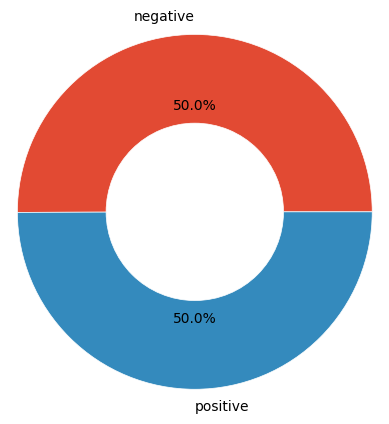

In [ ]:
train_pie, _, _ = plt.pie(class_samples.review, radius = 1.2,labels= class_samples.sentiment_class,autopct="%.1f%%")
plt.setp(train_pie, width=0.6, edgecolor='white')
plt.show()

**Discussion Stage**
* The classes are balanced.

**Validation Set**

In [ ]:
valid_class_samples = fetched_valid_data.groupby('sentiment_class').count()['review'].reset_index().sort_values(by='review',ascending=False)
valid_class_samples.style.background_gradient(cmap='winter')
plt.show()

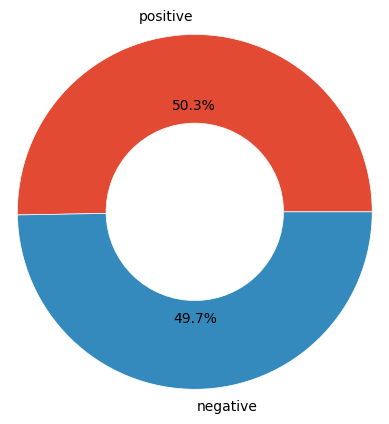

In [ ]:
valid_pie, _, _ = plt.pie(valid_class_samples.review, radius = 1.2,labels= valid_class_samples.sentiment_class,autopct="%.1f%%")
plt.setp(valid_pie, width=0.6, edgecolor='white')
plt.show()

**Discussion Stage**
* The classes are balanced.

## **Checking phrases lenght**

**Train Set**

In [ ]:
fetched_train_data['review_length'] = fetched_train_data['review'].apply(lambda x: len(x))

In [ ]:
fetched_train_data.sort_values(by='review_length', ascending=False).head()

review  sentiment  \
6378   Match 1: Tag Team Table Match Bubba Ray and Sp...          1   
34167  There's a sign on The Lost Highway that says:<...          1   
32922  Back in the mid/late 80s, an OAV anime by titl...          1   
27424  **Attention Spoilers**<br /><br />First of all...          1   
5878   Titanic directed by James Cameron presents a f...          1   

      sentiment_class  review_length  
6378         positive          13704  
34167        positive          12988  
32922        positive          12129  
27424        positive          10363  
5878         positive          10321

In [ ]:
fetched_train_data.describe()

sentiment  review_length
count  40000.000000   40000.000000
mean       0.499525    1310.293250
std        0.500006     988.358599
min        0.000000      32.000000
25%        0.000000     698.000000
50%        0.000000     973.000000
75%        1.000000    1596.000000
max        1.000000   13704.000000

**Validation Set**

In [ ]:
fetched_valid_data['review_length'] = fetched_valid_data['review'].apply(lambda x: len(x))

In [ ]:
fetched_valid_data.sort_values(by='review_length', ascending=False).head()

review  sentiment  \
1039  *!!- SPOILERS - !!*<br /><br />Before I begin ...          1   
4720  Polish film maker Walerian Borowczyk's La Bête...          1   
4410  *** Warning - this review contains "plot spoil...          0   
3448  The Merchant of Venice 8/10<br /><br />(This r...          1   
2704  CitizenX(1995) is the developing world's answe...          1   

     sentiment_class  review_length  
1039        positive           9345  
4720        positive           8056  
4410        negative           7761  
3448        positive           7126  
2704        positive           7068

In [ ]:
fetched_valid_data.describe()

sentiment  review_length
count  5000.000000     5000.00000
mean      0.502800     1297.36800
std       0.500042      979.91039
min       0.000000       52.00000
25%       0.000000      698.00000
50%       1.000000      957.00000
75%       1.000000     1560.25000
max       1.000000     9345.00000

**Distribution of phrase length on each class**

**Train Set**

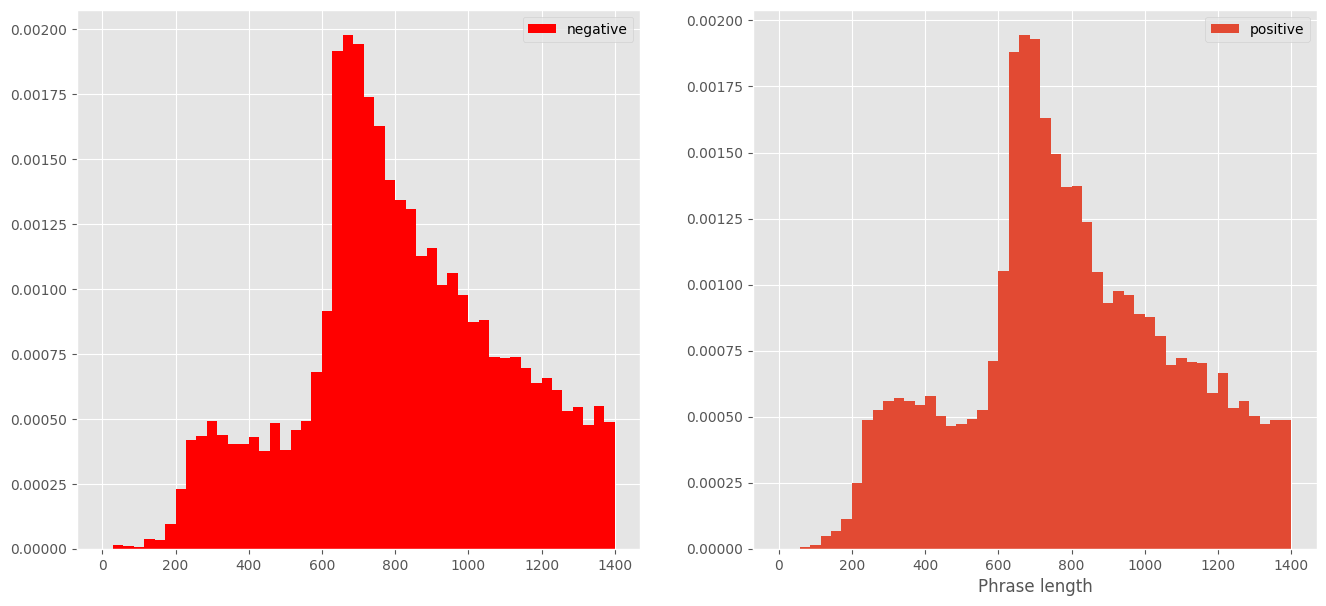

In [ ]:
plt.figure(figsize=(16,7))
bins = np.linspace(0,1400,50)
plt.subplot(121)
plt.hist(fetched_train_data[fetched_train_data['sentiment'] == 0]['review_length'], color= 'r', bins = bins, density = True, label = 'negative')
plt.legend()
plt.subplot(122)
plt.hist(fetched_train_data[fetched_train_data['sentiment'] ==1]['review_length'], bins = bins, density = True, label = 'positive')
plt.xlabel('Phrase length')
plt.legend()
plt.show()

**Validation Set**

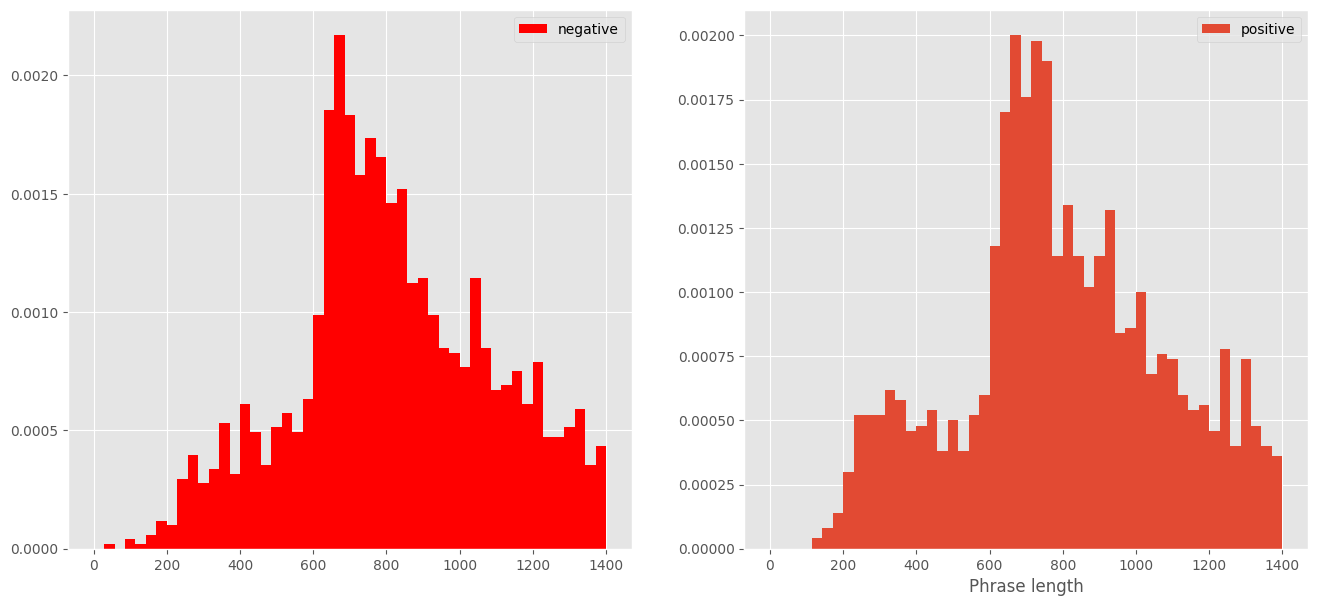

In [ ]:
plt.figure(figsize=(16,7))
bins = np.linspace(0,1400,50)
plt.subplot(121)
plt.hist(fetched_valid_data[fetched_valid_data['sentiment'] == 0]['review_length'], color = 'r', bins = bins, density = True, label = 'negative')
plt.legend()
plt.subplot(122)
plt.hist(fetched_valid_data[fetched_valid_data['sentiment'] ==1]['review_length'], bins = bins, density = True, label = 'positive')
plt.xlabel('Phrase length')
plt.legend()
plt.show()

**Discussion Stage**
* The two classes are distributed equally depends on the phrase length graph..

## Explore some reviews

In [ ]:
# Some Reviews with 0-Sentiment
fetched_train_data[fetched_train_data.sentiment == 0].review.values[:10]

array(['I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.',
       "When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I

In [ ]:
# Some Reviews with 1-Sentiment
fetched_train_data[fetched_train_data.sentiment == 1].review.values[:10]

array(['Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD\'s and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re run of certain episodes, Man and the hour, Enemy within the gates, Battle School and numerous others with a different edge. Introduction of a new General instead of Captain Square was a brilliant move - especially when he wouldn\'t cash the cheque (something that is rarely done now).<br /><br />It follows through the early years of getting equipment and uniforms, starting up and training. All in all, its a great film for a boring Sunday afternoon. <br /><br />Two draw backs. One is the Germans bogus dodgy accents (come one, Germans cant pronounced the letter "W" like us) and Two The casting of Liz Frazer instead of the familiar Janet Davis. I like Liz in other films like the carry ons but she doesn\'t carry it correctly in this and Janet Davis would have been the better choice.',
   

**Validation Set**

In [ ]:
# Some Reviews with 1-Sentiment
fetched_valid_data[fetched_valid_data.sentiment == 1].review.values[:10]

array(["This is the best movie I've ever seen! <br /><br />Maybe it's because I live just a few miles from the village were the story take place, and I know how things work out in this area in Sweden. The movie tells the truth, believe me! It both criticizes and honors the lifestyle of Dalarna, and the producer wants people who watch the movie to be more opened minded and care more for your closest friends and relatives.<br /><br />But if you live in another small village anywhere in Sweden (or another country) you will probably also recognize much from this movie.<br /><br />Thank you Maria Blom!",
       'The morbid Catholic writer Gerard Reve (Jeroen Krabbé) that is homosexual, alcoholic and has frequent visions of death is invited to give a lecture in the literature club of Vlissingen. While in the railway station in Amsterdam, he feels a non-corresponded attraction to a handsome man that embarks in another train. Gerard is introduced to the treasurer of the club and beautician Chr

In [ ]:
# Some Reviews with 0-Sentiment
fetched_valid_data[fetched_valid_data.sentiment == 0].review.values[:10]

array(['It\'s been about 14 years since Sharon Stone awarded viewers a leg-crossing that twisted many people\'s minds. And now, God knows why, she\'s in the game again. "Basic Instinct 2" is the sequel to the smash-hit erotica "Basic Instinct" featuring a sexy Stone and a vulnerable Michael Douglas. However, fans of the original might not even get close to this one, since "Instinct 2" is painful film-making, as the mediocre director Michael Caton-Jones assassinates the legacy of the first film.<br /><br />The plot of the movie starts when a car explosion breaks in right at the beginning. Catherine Tramell (Sharon Stone, trying to look forcefully sexy) is a suspect and appears to be involved in the murder. A psychiatrist (a horrible David Morrisey) is appointed to examine her, but eventually falls for an intimate game of seduction.<br /><br />And there it is, without no further explanations, the basic force that moves this "Instinct". Nothing much is explained and we have to sit through

## Check review words

**Train Set**

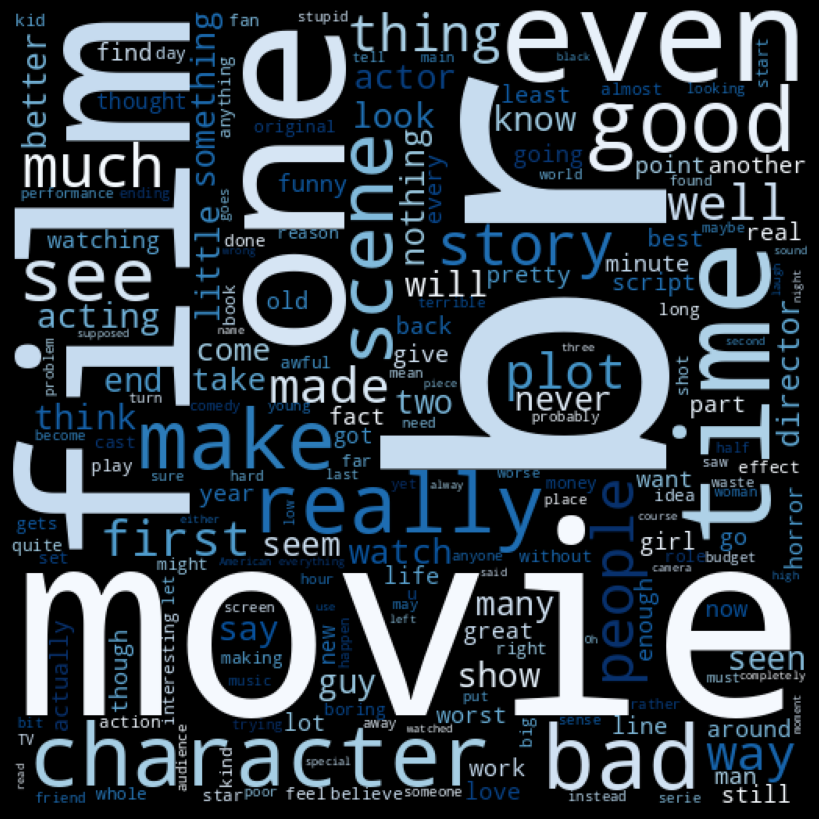

In [ ]:
# Visualize negative reviews using word cloud.
neg_review_words = ' '.join(list(fetched_train_data[fetched_train_data['sentiment'] == 0]['review']))
neg_review_words = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(neg_review_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(neg_review_words)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

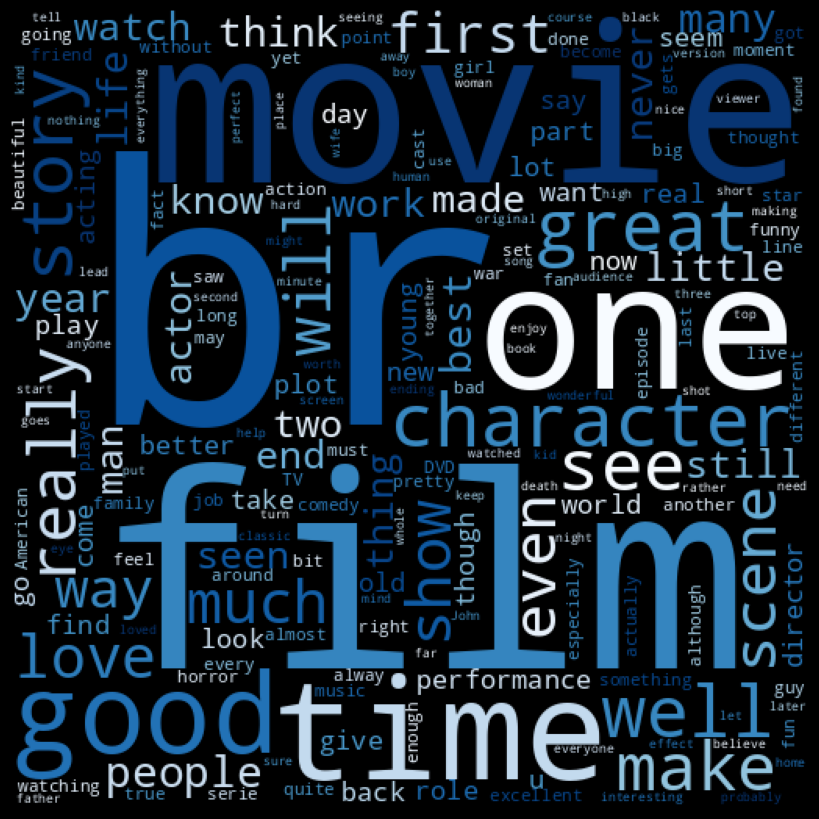

In [ ]:
# Visualize positive reviews using word cloud.
pos_review_words = ' '.join(list(fetched_train_data[fetched_train_data['sentiment'] == 1]['review']))
pos_review_words = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(pos_review_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(pos_review_words)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

**Validation Set**

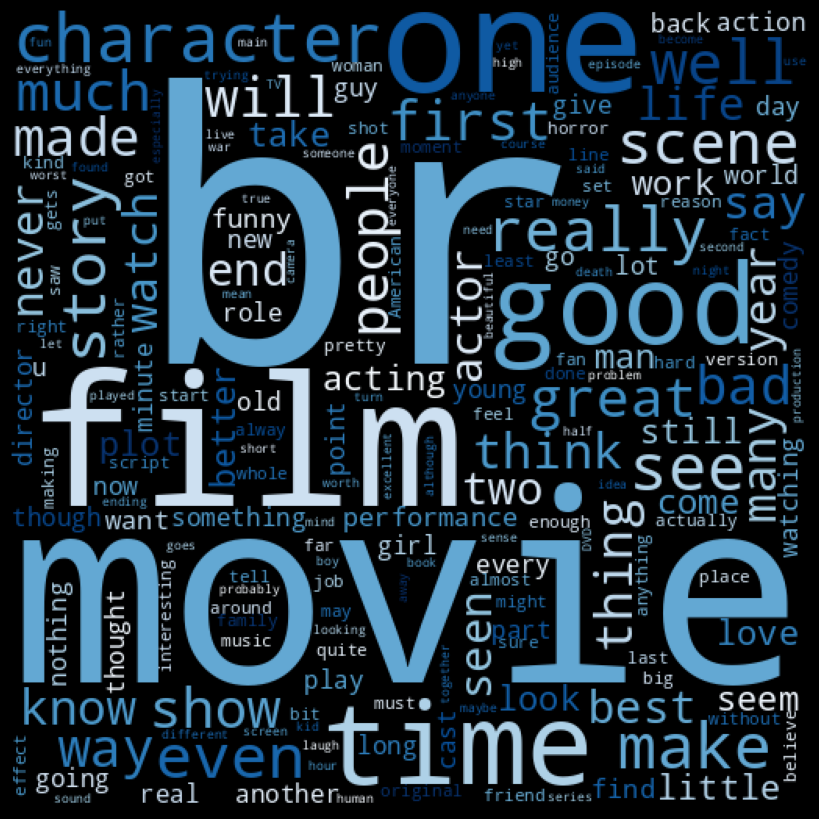

In [ ]:
# Visualize negative reviews using word cloud.
neg_review_words = ' '.join(list(fetched_valid_data.loc[fetched_train_data['sentiment'] == 0]['review']))
neg_review_words = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(neg_review_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(neg_review_words)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

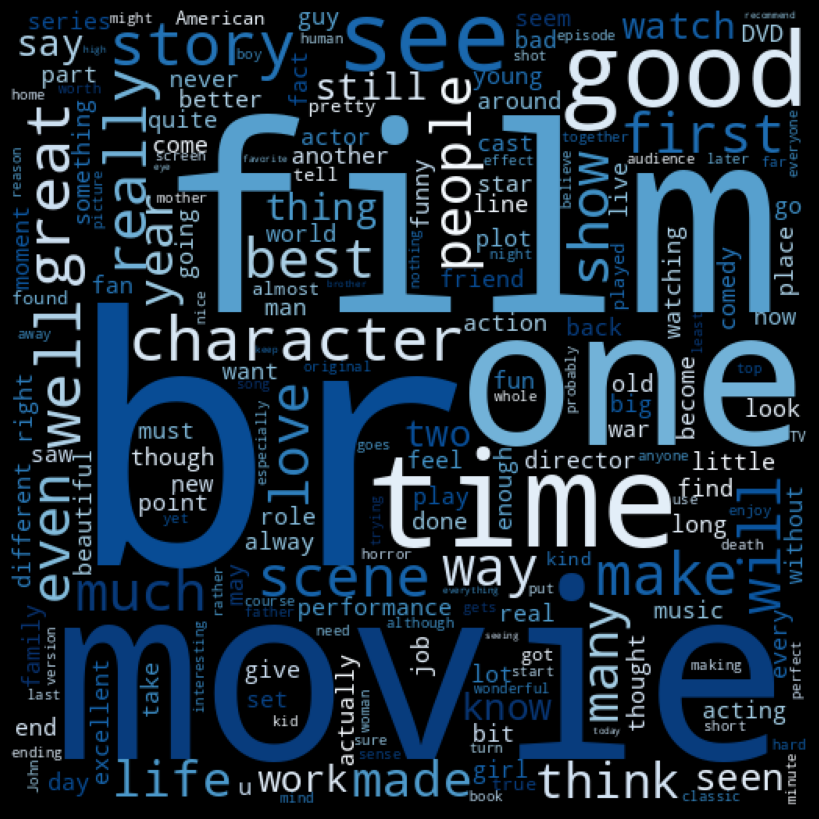

In [ ]:
# Visualize positive reviews using word cloud.
pos_review_words = ' '.join(list(fetched_valid_data.loc[fetched_valid_data['sentiment'] == 1]['review']))
pos_review_words = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(pos_review_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(pos_review_words)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## Check the effect of length

**Train Set**

CPU times: user 5.52 s, sys: 848 ms, total: 6.37 s
Wall time: 5.71 s


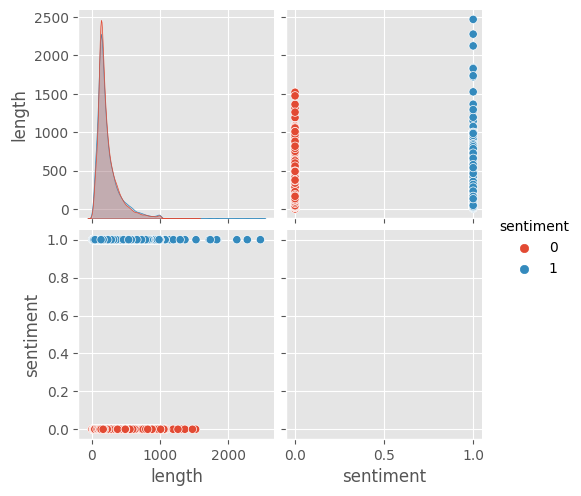

In [ ]:
# Check the effect of lenght on the sentiment
%%time
fetched_train_data['length'] = fetched_train_data.review.apply(lambda x: len(str(x).split(' ')))
sns.pairplot(fetched_train_data, hue = 'sentiment', vars = ['length', 'sentiment'])

**Discussion Stage**
* The effect is very close to each other.

**Validation Set**

CPU times: user 1.47 s, sys: 411 ms, total: 1.88 s
Wall time: 1.43 s


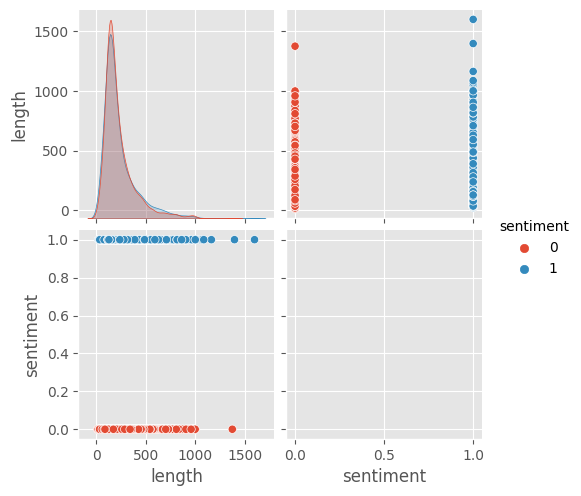

In [ ]:
# Check the effect of lenght on the sentiment
%%time
fetched_valid_data['length'] = fetched_valid_data.review.apply(lambda x: len(str(x).split(' ')))
sns.pairplot(fetched_valid_data, hue = 'sentiment', vars = ['length', 'sentiment'])

## Check the best length size

In [ ]:
# Find the best lenght.
for len_value in range(0, 1001, 100):
  temp_df=pd.DataFrame(fetched_train_data.review.str.split().map(lambda x: len(x))>=len_value)
  print(f'Number of sentences which contain more than {len_value} words: ', temp_df.loc[temp_df['review']==True].shape[0])
  print(' ')

Number of sentences which contain more than 0 words:  40000
 
Number of sentences which contain more than 100 words:  35191
 
Number of sentences which contain more than 200 words:  16543
 
Number of sentences which contain more than 300 words:  9026
 
Number of sentences which contain more than 400 words:  5212
 
Number of sentences which contain more than 500 words:  3170
 
Number of sentences which contain more than 600 words:  1902
 
Number of sentences which contain more than 700 words:  1178
 
Number of sentences which contain more than 800 words:  704
 
Number of sentences which contain more than 900 words:  409
 
Number of sentences which contain more than 1000 words:  71
 


**Discussion Stage**
* Here we can notice that the values between 500 and 600 are the best, So I will choose 512 as an initiate value.

## Check duplicated values

**Train Set**

In [ ]:
# Check duplicated values.
fetched_train_data.duplicated().sum()

277

In [ ]:
# Drop duplicated values.
fetched_train_data.drop_duplicates(inplace=True)

In [ ]:
fetched_train_data.duplicated().sum()

0

## Check null values

**Train Set**

In [ ]:
# Check null values.
fetched_train_data.isna().sum()

review             0
sentiment          0
sentiment_class    0
dtype: int64

# Data Cleaning and PreProcessing

## Data Cleaning

### Remove HTMLs

In [ ]:
# Remove HTMLs tags.
def remove_htmls(text):
  '''Remove HTMLs tags'''
  return BeautifulSoup(text, "lxml").text

### Remove URLs

In [ ]:
# Remove urls tags.
def remove_urls(text):
  '''Remove urls tags'''
  pattern = r'http[^\s]*'
  return re.sub(pattern, '', text)

### Remove Images

In [ ]:
def remove_images(text):
  '''Remove Images'''
  text = re.sub(r"pic\.twitter\.com/\S+",'', text)
  text = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", text)
  return text

### Remove mentions

In [ ]:
# Remove Mention.
def remove_mention(text):
  '''Remove Mention'''
  pattern = r"@\S+"
  return re.sub(pattern, '', text)

### Remove Emoji

In [ ]:
# Function to remove emoji.
def remove_emoji(text):
  '''Function to remove emoji'''
  emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

### Remove Emoticons

In [ ]:
# Function for removing emoticons.
def remove_emoticons(text):
  '''Function for removing emoticons'''
  emoji_pattern = re.compile("["
  u"\U0001F600-\U0001F64F"  # emoticons
  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
  u"\U0001F680-\U0001F6FF"  # transport & map symbols
  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
  u"\U0001F1F2-\U0001F1F4"  # Macau flag
  u"\U0001F1E6-\U0001F1FF"  # flags
  u"\U0001F600-\U0001F64F"
  u"\U00002702-\U000027B0"
  u"\U000024C2-\U0001F251"
  u"\U0001f926-\U0001f937"
  u"\U0001F1F2"
  u"\U0001F1F4"
  u"\U0001F620"
  u"\u200d"
  u"\u2640-\u2642"
  "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'',text)
  return text

### Remove non-ASCII character

In [ ]:
# Remove non ascii.
def remove_non_ascii(text):
  '''Remove Mention'''
  return ''.join(i for i in text if i in string.printable)

### Remove Punctuation

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Remove Punctuation.
def remove_punctuation(text):
  '''Remove Punctuation'''
  return re.sub('[%s]' % re.escape("\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"), '', text)

### Remove Extra Alphabatic characters

In [ ]:
# Remove more than one alphabatic characters.
def remove_extra_alphabatic(text):
  '''Remove more than one alphabatic characters'''
  pattern = r'(.{2})\1+'
  return re.sub(pattern, r'\1', text)

### Remove first and  end spaces

In [ ]:
# Remove first and end spaces.
def remove_first_end_spaces(string):
  '''Remove first and end spaces'''
  return "".join(string.rstrip().lstrip())

### Remove Numbers

In [ ]:
# Remove Numbers.
def remove_numbers(text):
  '''Remove Numbers'''
  text = re.sub(r'[d]+', r'', text)
  text = re.sub(r'[0-9]*','',text)
  text = re.sub(r'([0-9]*\-[0-9]*)*', '', text)
  return text

### Convert text words to lower case

### Remove single character

In [ ]:
# Remove single char.
def remove_single_char(text):
  '''
  Removes single characters from string, if present
  
  Step 1: Use word_tokenize() to get tokens from string
  Step 2: Removes words whose length falls below the threshold (by default = 1)
  
  Args:
      text (str): String to which the functions are to be applied, string
  
  Returns:
      String with removed words whose length was below the threshold (by default = 1)
  ''' 
  threshold = 2
  
  words = word_tokenize(text)
  text = ' '.join([word for word in words if len(word) > threshold])
  return text

### Remove stop words

In [ ]:
english_stop_words = set(stopwords.words('english'))
english_stop_words.update(punctuation)

In [ ]:
# Remove stop words.
def remove_stop_words(text):
  '''Remove stop words'''
  return ' '.join([word for word in word_tokenize(text) if word not in english_stop_words])

### Remove non-English words

In [ ]:
words = set(nltk.corpus.words.words())
def non_eng(text):
  sent = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
  return sent

### Lemmatization

In [ ]:
# Create Lemmatizer Object.
wnl = WordNetLemmatizer()

In [ ]:
# Lemmatize word in sentences.
def lemmatize(s):
  '''Lemmatize word in sentences'''
  s = [wnl.lemmatize(word.strip(), pos='v') for word in word_tokenize(s)]
  return s

### Stemming

In [ ]:
# Create Stemmer Object.
stemmer = PorterStemmer()

In [ ]:
# Stem word in sentences.
def stemmer_func(s):
  '''Stem word in sentences'''
  s = [stemmer.stem(word.strip()) for word in word_tokenize(s)]
  return s

**Applying all functions**

In [ ]:
def process_text_data(text_data):
    '''Applying Remove HTMLs, Remove URLs, Remove Images, Remove mentions, Remove Emoji, Remove Emoticons
    Remove non-ASCII character, Remove Punctuation, Remove Extra Alphabatic characters, Remove first and end spaces,
    Remove Numbers, Convert text words to lower case, Remove single character, and Remove stop words functions'''
    text_data = (text_data
                 .swifter.apply(lambda word : word.lower())
                 .swifter.apply(remove_urls)
                 .swifter.apply(remove_htmls)
                 .swifter.apply(remove_images)
                 .swifter.apply(remove_mention)
                 #.swifter.apply(remove_emoji)
                 #.swifter.apply(remove_emoticons)
                 .swifter.apply(remove_punctuation)
                 .swifter.apply(remove_non_ascii)
                 .swifter.apply(remove_first_end_spaces)
                 .swifter.apply(remove_extra_alphabatic)
                 .swifter.apply(remove_single_char)
                 .swifter.apply(remove_stop_words)
                 .swifter.apply(remove_numbers)
                 .swifter.apply(non_eng)
                #.swifter.apply(lemmatize)
                 )
    
    return text_data

**Train Set**

In [ ]:
# Data cleaning for train set
%time 
proc_train_data = process_text_data(fetched_train_data.review)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

<ipython-input-31-862a90022783>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text


Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

In [ ]:
# Convert the data again to dataframe.
proc_train_data = pd.DataFrame(data={'review':proc_train_data})

In [ ]:
# Concatenating along columns.
proc_train_data = pd.concat([proc_train_data, fetched_train_data["sentiment"]], axis=1)

In [ ]:
# Clear empty lists.
train_data = proc_train_data[proc_train_data.astype(str)['review'] != '[]']

In [ ]:
# Reset index as a final step in preprocess step.
train_data.reset_index(drop= True, inplace = True)

In [ ]:
# Print the first 5 samples in the data.
train_data.head()

review  sentiment
0  grew watching loving school school lunch schoo...          0
1  put movie v player sat coke chips movie contai...          0
2  people know particular time past like feel nee...          0
3  even though great interest bore every minute m...          0
4  ie as army fan nothing ever change got every t...          1

In [ ]:
# Print the last 5 samples in the data.
train_data.tail()

review  sentiment
39718  western union something forgotten classic west...          1
39719  movie piece work every nook cranny human min p...          1
39720  wife movie plan visit soon fortunately unfortu...          0
39721  first amaze necessary goo movie cast superb pl...          1
39722  film goo gross estimate cigar smoking magical ...          1

In [ ]:
# Check the first 10 values.
train_data[0:10]

review  sentiment
0  grew watching loving school school lunch schoo...          0
1  put movie v player sat coke chips movie contai...          0
2  people know particular time past like feel nee...          0
3  even though great interest bore every minute m...          0
4  ie as army fan nothing ever change got every t...          1
5  terrible movie everyone sai mae laugh cameo ap...          0
6  finally shocking movie last night unbelievably...          1
7  caught film cable like goo film green car cant...          0
8  may remake tale eleven rock music movie expres...          1
9  super pleasant surprise really horrible movie ...          1

In [ ]:
# Check the lenght of train data after data cleaning and proprocessing.
len(train_data)

39723

In [ ]:
# Set the final cleaned data to new column.
train_data['clean_pre-precess_review'] = train_data['review']

**Validation Set**

In [ ]:
# Data cleaning for validation set
%time 
proc_valid_data = process_text_data(fetched_valid_data.review)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

<ipython-input-31-862a90022783>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text


Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
# Convert the data again to dataframe.
proc_valid_data = pd.DataFrame(data={'review':proc_valid_data})

In [ ]:
# Concatenating along columns.
proc_valid_data = pd.concat([proc_valid_data, fetched_valid_data["sentiment"]], axis=1)

In [ ]:
# Clear empty lists.
valid_data = proc_valid_data[proc_valid_data.astype(str)['review'] != '[]']

In [ ]:
# Reset index as a final step in preprocess step.
valid_data.reset_index(drop= True, inplace = True)

In [ ]:
# Print the fist 5 samples in the data.
valid_data.head()

review  sentiment
0  since stone aware many go game basic instinct ...          0
1  someone nee make car payment truly awful jean ...          0
2  state comment must contain minimum four reason...          0
3  movie mule mishmash recent cinema promising cl...          0
4  laurel smaller half team contract billy series...          0

In [ ]:
# Print the last 5 samples in the data.
valid_data.tail()

review  sentiment
4995  man love movie really back still classroom goo...          1
4996  recovery moving piece work effects brain injur...          1
4997  take crook joint take joint crook weve seen ki...          1
4998  show preserve experimental movement new york s...          1
4999  mother recently mother two awakening life slee...          1

In [ ]:
# Check the first 10 values.
valid_data[0:10]

review  sentiment
0  since stone aware many go game basic instinct ...          0
1  someone nee make car payment truly awful jean ...          0
2  state comment must contain minimum four reason...          0
3  movie mule mishmash recent cinema promising cl...          0
4  laurel smaller half team contract billy series...          0
5  best movie ever seen maybe live village story ...          1
6  catholic writer reve homosexual alcoholic freq...          1
7  angel weak movie trying fin killer people acce...          0
8  task sports romance reality sports romance tog...          1
9  waste life watching film even mae even reviewe...          0

In [ ]:
# Check the lenght of valid data after data cleaning and proprocessing
len(valid_data)

5000

In [ ]:
# Set the final cleaned data to new column.
valid_data['clean_pre-precess_review'] = valid_data['review']

# Deep EDA

## Find Sents, Tokens, Lemma, POS, and NER

**Train Set**

In [ ]:
def annon(dataframe, column):
  '''
  Extract documents Sentences, Tokens, Lemmatization, POS, and NER.
  Args:
  dataframe -- dataframe type which we want to extract information from.
  column-- str type which is a dataframe column that contains texts.
  Returns:
  DataFrame which contains Sentences, Tokens, Lemmatization, POS, and NER information.
  '''
  # Place holder variabels.
  sents = []
  tokens = []
  lemma = []
  pos = []
  ner = []

  # Configure time variable.
  t0 = datetime.now()

  for review_ in nlp.pipe(dataframe[column], batch_size = 32, n_process=3):
      if review_.has_annotation("DEP"):
          tokens.append([e.text for e in review_])
          sents.append([sent.text.strip() for sent in review_.sents])
          pos.append([e.pos_ for e in review_])
          ner.append([e.text for e in review_.ents])
          lemma.append([n.lemma_ for n in review_])
      else:
          # We want to make sure that the lists of parsed results have the same number of entries of the original Dataframe, so add some blanks in case the parse fails.
          tokens.append(None)
          lemma.append(None)
          pos.append(None)
          sents.append(None)
          ner.append(None)

  dataframe['tokens'] = tokens
  dataframe['lemma'] = lemma
  dataframe['pos'] = pos
  dataframe['sents'] = sents
  dataframe['ner'] = ner
  # Compute process time.
  t1 = datetime.now()
  print('Processing time: {}'.format(t1 - t0))
  return dataframe

In [ ]:
# Call annon function.
train_data = annon(train_data, 'review')

Processing time: 0:07:31.851922


In [ ]:
# Print the first 5 rows.
# train_data.head()

In [ ]:
# re-joined.
train_data['clean_pre-precess_review'] = train_data['lemma'].apply(' '.join)

In [ ]:
# Dealing with a single char.
train_data['clean_pre-precess_review'] = train_data['clean_pre-precess_review'].apply(remove_single_char)

In [ ]:
# Print the first 5 rows.
train_data.head()

review  sentiment  \
0  grew watching loving school school lunch schoo...          0   
1  put movie v player sat coke chips movie contai...          0   
2  people know particular time past like feel nee...          0   
3  even though great interest bore every minute m...          0   
4  ie as army fan nothing ever change got every t...          1   

                            clean_pre-precess_review  \
0  grow watch love school school lunch school one...   
1  put movie player sit coke chip movie contain f...   
2  people know particular time past like feel nee...   
3  even though great interest bore every minute m...   
4  army fan nothing ever change get every time br...   

                                              tokens  \
0  [grew, watching, loving, school, school, lunch...   
1  [put, movie, v, player, sat, coke, chips, movi...   
2  [people, know, particular, time, past, like, f...   
3  [even, though, great, interest, bore, every, m...   
4  [ie, as, army, fan, nothing, ever, change, got...   

                                               lemma  \
0  [grow, watch, love, school, school, lunch, sch...   
1  [put, movie, v, player, sit, coke, chip, movie...   
2  [people, know, particular, time, past, like, f...   
3  [even, though, great, interest, bore, every, m...   
4  [ie, as, army, fan, nothing, ever, change, get...   

                                                 pos  \
0  [VERB, VERB, VERB, NOUN, NOUN, NOUN, PROPN, NU...   
1  [VERB, NOUN, NOUN, NOUN, VERB, PROPN, NOUN, NO...   
2  [NOUN, VERB, ADJ, NOUN, ADJ, INTJ, VERB, NOUN,...   
3  [ADV, SCONJ, ADJ, NOUN, NOUN, DET, NOUN, NOUN,...   
4  [ADV, SCONJ, NOUN, NOUN, PRON, ADV, VERB, VERB...   

                                               sents  \
0  [grew watching loving school school lunch scho...   
1  [put movie v player sat coke chips movie conta...   
2  [people know particular time past like feel ne...   
3  [even though great interest bore every minute ...   
4  [ie as army fan nothing ever change got every ...   

                                                 ner  
0                              [one, one, han chair]  
1  [first, first, first, first, first, one, three...  
2                                                 []  
3                                     [every minute]  
4        [army, hour, one, afternoon, two, one, two]

**Save all of these process**

In [ ]:
# train_data.to_pickle('train.pkl')

In [ ]:
# with open('/content/train.pkl', 'rb') as f:
#     train_data['Lemmatized_Reviews'] = pickle.load(f)

**Valid Set**

In [ ]:
# Call annon function.
valid_data = annon(valid_data, 'review')

Processing time: 0:01:00.237932


In [ ]:
# Print the first 5 rows.
valid_data.head()

review  sentiment  \
0  since stone aware many go game basic instinct ...          0   
1  someone nee make car payment truly awful jean ...          0   
2  state comment must contain minimum four reason...          0   
3  movie mule mishmash recent cinema promising cl...          0   
4  laurel smaller half team contract billy series...          0   

                            clean_pre-precess_review  \
0  since stone aware many go game basic instinct ...   
1  someone nee make car payment truly awful jean ...   
2  state comment must contain minimum four reason...   
3  movie mule mishmash recent cinema promising cl...   
4  laurel smaller half team contract billy series...   

                                              tokens  \
0  [since, stone, aware, many, go, game, basic, i...   
1  [someone, nee, make, car, payment, truly, awfu...   
2  [state, comment, must, contain, minimum, four,...   
3  [movie, mule, mishmash, recent, cinema, promis...   
4  [laurel, smaller, half, team, contract, billy,...   

                                               lemma  \
0  [since, stone, aware, many, go, game, basic, i...   
1  [someone, nee, make, car, payment, truly, awfu...   
2  [state, comment, must, contain, minimum, four,...   
3  [movie, mule, mishmash, recent, cinema, promis...   
4  [laurel, small, half, team, contract, billy, s...   

                                                 pos  \
0  [SCONJ, NOUN, ADJ, ADJ, VERB, NOUN, ADJ, NOUN,...   
1  [PRON, NOUN, VERB, NOUN, NOUN, ADV, ADJ, ADJ, ...   
2  [NOUN, NOUN, AUX, VERB, ADJ, NUM, NOUN, VERB, ...   
3  [NOUN, ADJ, NOUN, ADJ, NOUN, VERB, ADV, VERB, ...   
4  [PROPN, ADJ, ADJ, NOUN, NOUN, ADV, VERB, ADJ, ...   

                                               sents  \
0  [since stone aware many go game basic instinct...   
1  [someone nee make car payment truly awful jean...   
2  [state comment must contain minimum four reaso...   
3  [movie mule mishmash recent cinema promising c...   
4  [laurel smaller half team contract billy serie...   

                                                 ner  
0           [erotica, first, first, first, mae, two]  
1                                 [jean, hour, coul]  
2                                        [four, one]  
3                            [creepy, lee, one, two]  
4  [laurel smaller half team, joe, two, joe, joe ...

In [ ]:
# re-joined.
valid_data['clean_pre-precess_review'] = valid_data['lemma'].apply(' '.join)

In [ ]:
# Dealing with a single char.
valid_data['clean_pre-precess_review'] = valid_data['clean_pre-precess_review'].apply(remove_single_char)

In [ ]:
# valid_data.to_pickle('valid.pkl')

In [ ]:
# with open('/content/valid.pkl', 'rb') as f:
#     valid_data = pickle.load(f)

## Find the best N-Grams

In [ ]:
def find_ngrams(data):
  class_text = " ".join(data.tolist())
  tokens= word_tokenize(class_text)
  # unigram
  print('uni_gram -> HighFreq:')
  unigram_freq = nltk.ngrams(tokens, 1)
  unigram_freq=nltk.FreqDist(unigram_freq)
  print(unigram_freq.most_common()[:10])
  print('uni_gram -> LowFreq:')
  print(unigram_freq.most_common()[-10:])
  print('\n')
  
  # bigram
  print('bi_gram -> HighFreq:')
  bigram_freq = nltk.ngrams(tokens, 2)
  bigram_freq=nltk.FreqDist(bigram_freq)
  print(bigram_freq.most_common()[:10])
  print('bi_gram -> LowFreq:')
  print(bigram_freq.most_common()[-10:])
  print('\n')
    
  # trigram
  print('tri_gram -> HighFreq:')
  trigram_freq = nltk.ngrams(tokens, 3)
  trigram_freq=nltk.FreqDist(trigram_freq)
  print(trigram_freq.most_common()[:10])
  print('tri_gram -> LowFreq:')
  print(trigram_freq.most_common()[-10:])

In [ ]:
find_ngrams(train_data['clean_pre-precess_review'])

uni_gram -> HighFreq:
[(('movie',), 67099), (('film',), 59494), (('one',), 45116), (('see',), 36309), (('like',), 33726), (('well',), 26099), (('time',), 23119), (('goo',), 22974), (('get',), 22030), (('even',), 19507)]
uni_gram -> LowFreq:
[(('systemic',), 1), (('slacking',), 1), (('soulfulness',), 1), (('stater',), 1), (('hatchway',), 1), (('unlogical',), 1), (('youl',), 1), (('strictness',), 1), (('amnesic',), 1), (('seascape',), 1)]


bi_gram -> HighFreq:
[(('can', 'not'), 5960), (('see', 'movie'), 2989), (('ever', 'see'), 2399), (('will', 'not'), 2143), (('watch', 'movie'), 1959), (('see', 'film'), 1935), (('special', 'effect'), 1770), (('even', 'though'), 1514), (('waste', 'time'), 1368), (('one', 'good'), 1339)]
bi_gram -> LowFreq:
[(('staff', 'national'), 1), (('national', 'mirror'), 1), (('mirror', 'sparky'), 1), (('sparky', 'way'), 1), (('exact', 'make'), 1), (('good', 'heaven'), 1), (('heaven', 'home'), 1), (('home', 'ben'), 1), (('respect', 'rea'), 1), (('comment', 'bye'), 

**Discussion Stage**
* Here, we can analyse the best N-Gram to choose.

## Checking the most frequent words.

**Train Set**

In [ ]:
# Checking the first 10 most frequent words.
cn_obj_train = Counter()
for text in train_data['clean_pre-precess_review'].values:
    for word in text.split():
        cn_obj_train[word] += 1
cn = cn_obj_train.most_common()
# save the model to disk
# pickle.dump(cn, open('most_frequent_words.pkl', 'wb'))

In [ ]:
# Print the first 10 common words.
cn_obj_train.most_common()[:10]

[('movie', 67099),
 ('film', 59494),
 ('one', 45116),
 ('see', 36309),
 ('like', 33726),
 ('well', 26099),
 ('time', 23119),
 ('goo', 22974),
 ('get', 22030),
 ('even', 19507)]

In [ ]:
# Create data frame contains words and their counts.
train_all_reviews = " ".join(train_data['clean_pre-precess_review'].tolist())
train_tokens =  word_tokenize(train_all_reviews)
train_counts_all = collections.Counter(train_tokens)
# The most common words.
train_counts_all.most_common(10)
train_counts_all_df = pd.DataFrame(train_counts_all.most_common(10), columns=['words', 'count'])
train_counts_all_df.head(10)

words  count
0  movie  67099
1   film  59494
2    one  45116
3    see  36309
4   like  33726
5   well  26099
6   time  23119
7    goo  22974
8    get  22030
9   even  19507

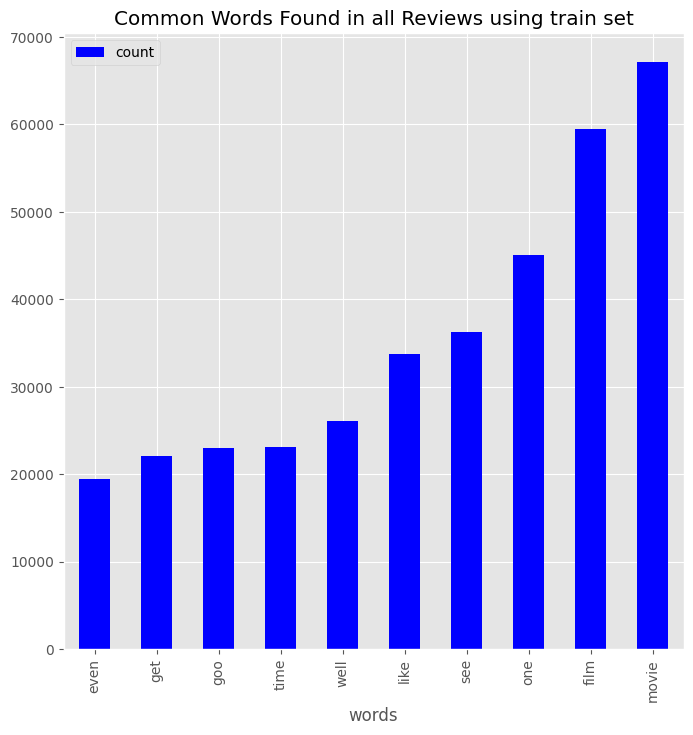

In [ ]:
# Create a plot of common words.
fig, ax = plt.subplots(figsize=(8, 8))

train_counts_all_df.sort_values(by='count').plot(x = 'words', y = 'count', ax = ax, color = "blue", kind = 'bar')

ax.set_title("Common Words Found in all Reviews using train set")

plt.show()

In [ ]:
# Print the last 10 words (unfrequent words).
cn_obj_train.most_common()[-20:]

[('clipper', 1),
 ('unliving', 1),
 ('earless', 1),
 ('shaver', 1),
 ('regatta', 1),
 ('hunh', 1),
 ('conniver', 1),
 ('cellophane', 1),
 ('auric', 1),
 ('topaz', 1),
 ('systemic', 1),
 ('slacking', 1),
 ('soulfulness', 1),
 ('stater', 1),
 ('hatchway', 1),
 ('unlogical', 1),
 ('youl', 1),
 ('strictness', 1),
 ('amnesic', 1),
 ('seascape', 1)]

### Dealing with frequent words

**Train Set**

In [ ]:
# Removing the frequent words.
freq = set([w for (w, wc) in cn_obj_train.most_common(2)])
# function to remove the frequent words.
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not in freq])
# Passing the function freqwords.
train_data["clean_pre-precess_review"] = train_data["clean_pre-precess_review"].apply(freqwords)
train_data["clean_pre-precess_review"].head()

0    grow watch love school school lunch school one...
1    put player sit coke chip contain first animati...
2    people know particular time past like feel nee...
3    even though great interest bore every minute e...
4    army fan nothing ever change get every time br...
Name: clean_pre-precess_review, dtype: object

### Dealing with unfrequent words

**Train Set**

In [ ]:
# # Removal of 10 rare words 
# freq = pd.Series(' '.join(train_data["clean_pre-precess_review"]).split()).value_counts()[-4:] # 4 rare words
# freq = list(freq.index)
# train_data["clean_pre-precess_review"] = train_data["clean_pre-precess_review"].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
# train_data["clean_pre-precess_review"].head()

In [ ]:
# train_data["clean_pre-precess_review"].apply(remove_single_char)
# train_data["clean_pre-precess_review"].head()

## Split data and prepared it to the models

**Down Sampling Data ONLY in case of speeding the training process**

In [ ]:
# train_data = resample(train_data,
#              replace=True,
#              n_samples= int(len(train_data) / 3),
#              stratify= train_data.Sentiments,
#              random_state=42)

In [ ]:
# train_data.reset_index(drop= True, inplace = True)

In [ ]:
# Create training and labels dataframe.
training_data = train_data['clean_pre-precess_review'].astype(str)
train_labels_data = train_data.sentiment

In [ ]:
# Create training and labels dataframe.
validation_data = valid_data['clean_pre-precess_review'].astype(str)
valid_labels_data = valid_data.sentiment

In [ ]:
def split_by_victorizer(training_vector, labels_data, test_size):
  # Split the data using stratified split.
  training_data, val_data, training_labels, val_labels = train_test_split(training_vector, labels_data, 
                                                    test_size= test_size, random_state= 42, shuffle=True, stratify= labels_data
                                                    )
  return training_data, val_data, training_labels, val_labels

## Vectorizing

## Count Vectorizer

In [ ]:
# Create a Vectorizer object.
count_vectorizer = CountVectorizer(analyzer = 'word', ngram_range=(1, 3))
 
count_vectorizer.fit(training_data, train_labels_data)
 
# Printing the identified Unique words along with their indices.
print("Vocabulary: ", count_vectorizer.vocabulary_)
 
# Encode the Document.
count_vector = count_vectorizer.transform(training_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# pickle.dump(count_vectorizer, open('count_vector_Lemma.pkl', 'wb'))

**split `Count` Vectorizer data**

In [ ]:
TEST_SIZE = 0.3
count_training_data, count_val_data, count_training_labels, count_val_labels = split_by_victorizer(count_vector, train_labels_data, TEST_SIZE)

In [ ]:
print(f'''
      The shape of training data is: {count_training_data.shape},
      The shape of validation data is: {count_val_data.shape},
      The shape of training labels is: {count_training_labels.shape},
      The shape of validation labels is: {count_val_labels.shape},
      ''')


      The shape of training data is: (27806, 3941353),
      The shape of validation data is: (11917, 3941353),
      The shape of training labels is: (27806,),
      The shape of validation labels is: (11917,),
      


**Validation set**

In [ ]:
# Encode the Document.
valid_count_vector = count_vectorizer.transform(validation_data)

**split `Count` Vectorizer data**

In [ ]:
print(f'''
      The shape of training data is: {valid_count_vector.shape},
      The shape of validation labels is: {valid_labels_data.shape},
      ''')


      The shape of training data is: (5000, 3941353),
      The shape of validation labels is: (5000,),
      


## TF-IDF Vectorizer

In [ ]:
# Create Vectorizer object.
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
# fit and transform it on training data.
tfidf_vector  = vectorizer.fit_transform(training_data)

In [ ]:
# pickle.dump(vectorizer, open('TfidfVec_Lemma.pkl', 'wb'))

**split `TF-IDF` Vectorizer data**

In [ ]:
TEST_SIZE = 0.3
tfidf_training_data, tfidf_val_data, tfidf_training_labels, tfidf_val_labels = split_by_victorizer(tfidf_vector, train_labels_data, TEST_SIZE)

In [ ]:
print(f'''
      The shape of training data is: {tfidf_training_data.shape},
      The shape of validation data is: {tfidf_val_data.shape},
      The shape of training labels is: {tfidf_training_labels.shape},
      The shape of validation labels is: {tfidf_val_labels.shape},
      ''')


      The shape of training data is: (27806, 3941353),
      The shape of validation data is: (11917, 3941353),
      The shape of training labels is: (27806,),
      The shape of validation labels is: (11917,),
      


**Validation set**

In [ ]:
# Transform it on training data.
valid_tfidf_vector  = vectorizer.transform(validation_data) 

**split `Count` Vectorizer data**

In [ ]:
print(f'''
      The shape of training data is: {valid_tfidf_vector.shape},
      The shape of validation labels is: {valid_labels_data.shape},
      ''')


      The shape of training data is: (5000, 3941353),
      The shape of validation labels is: (5000,),
      


# Modelling

## Machine Learning Models

In [ ]:
def cross_val(algorithm_name, vectorizer_name, model, X= None, y= None, scoring= 'f1_macro', cv= 3):
  '''
  Prints the evaluation values.
  Args:
  algorithm_name-- str type represents the name.
  vectorizer_name-- str type represents the vectorizer name.
  model-- the model we want to evaluate by.
  X-- training data.
  Y-- labeled data.
  scoring-- scoring metric.
  cv-- int describe the number of kfolds.
  Returns:
  The evaluation metric of the model.
  '''
  # create an instance of the model in cross_val_score and initialize it.
  model_cross_val= cross_val_score(estimator= model,
                            X= X, y= y,
                            scoring= scoring, cv= cv)
  # display the basic results of cross validation step
  print('''
  {algorithm_name} Classification with {vectorizer_name} Vectorizer Cross Validation Mean Result is: {mean}\n\
  {algorithm_name} Classification with {vectorizer_name} Vectorizer Cross Validation Standard Deviation Result is: {std}\n\
  {algorithm_name} Classification with {vectorizer_name} Vectorizer Cross Validation Score Result is:\n{score}'''.format(algorithm_name= algorithm_name, vectorizer_name= vectorizer_name, mean= model_cross_val.mean(), std= model_cross_val.std(), score= model_cross_val))

In [ ]:
def learning_plot(algorithm_name, vectorizer_name, model, X= None, y= None, scoring= 'f1_macro', cv= 3):
  '''
  Prints the evaluation values.
  Args:
  algorithm_name-- str type represents the name.
  vectorizer_name-- str type represents the vectorizer name.
  model-- the model we want to evaluate by.
  X-- training data.
  Y-- labeled data.
  scoring-- scoring metric.
  cv-- int describe the number of kfolds.
  Returns:
  The evaluation metric of the model.
  '''
  train_sizes = [516, 4567, 8429, 1064, 12348,18746, 23548, 25025]
  train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model,
    X = X,
    y = y, train_sizes = train_sizes, cv = cv,
    scoring = scoring)
  # training scores.
  train_scores_mean = train_scores.mean(axis = 1)
  validation_scores_mean = validation_scores.mean(axis = 1)
  # plot training scores.
  plt.plot(train_sizes, train_scores_mean, label = 'Training Scores')
  # plot validation scores.
  plt.plot(train_sizes, validation_scores_mean, label = 'Validation Scores')
  # plot ylabel.
  plt.ylabel('F1 score', fontsize = 14)
  # plot xlabel.
  plt.xlabel('Training set size', fontsize = 14)
  # plot title.
  plt.title(f'Learning curves of the {algorithm_name} Classification model with {vectorizer_name} Vectorizer', fontsize = 18, y = 1.03)
  plt.legend()
  return plt.show()

In [ ]:
def classifier_process(model_obj, model_name, vectorizer_name, f1_average = "macro",  learninig_score = 'f1_macro',
                       training_data = None, training_labels = None, val_data = None, val_labels = None,
                       cross_val_use = True, learning_plot_use = True):
  '''
  Combine all classification process into one function call.
  Args:
  model_obj-- object indicates model object.
  model_name-- str indicates model name.
  vectorizer_name-- str type represents the vectorizer name.
  f1_average-- score type of the model that we want to evaluate by.
  learninig_score-- learning curve score type of the model that we want to evaluate by.
  training_data-- training data.
  training_labels-- labeled data.
  val_data-- validation data.
  val_labels-- validation data.
  cross_val_use-- boolian variable indicates the ability to use cross validation method.
  learning_plot_use-- boolian variable indicates the ability to use learning curve method.
  Returns:
  Full Process of classification steps and evaluation on Cross Validation, Learning Rate, and validation set.
  '''
  # Create an object of the Model Classifier class.
  model = model_obj
  # Fit the training data on the training set.
  model = model.fit(training_data, training_labels)
  # Compute the f1 score.
  model_score = f1_score(training_labels, model.predict(training_data), average= f1_average)
  print(f"{model_name} Model, F1-score is:", model_score)
  print('#'*100)
  if cross_val_use == True:
    # Evaluation using Cross-Validation.
    cross_val(model_name, vectorizer_name, model, X= training_data, y= training_labels)
    print('#'*100)
  if learning_plot_use == True:
    # Evaluation using learning curve.
    learning_plot(model_name, vectorizer_name, model,
                        X= training_data, y= training_labels, scoring= learninig_score)
    print('#'*100)
  # For better evaluation I will use classification report.
  print(f"{model_name} Model Classification Report score is:\n", classification_report(val_labels, model.predict(val_data)))
  print('#'*100)
  # Check accuracy on validation set.
  model_test_score = f1_score(val_labels, model.predict(val_data), average= f1_average)
  
  print(f"{model_name} Model, Validation score is:", model_test_score)
  print('#'*100)
  return model_name, vectorizer_name, model_score, model_test_score

In [ ]:
def plot_multiclass_roc(clf_name, vectorizer_name, clf, X_test, y_test, n_classes, figsize=(10, 6)):
  '''
  Plots multiclass ROS.
  Args:
  clf_name-- str type represents the name of the model.
  vectorizer_name-- str type represents the vectorizer name.
  clf-- object indicates the classifier object.
  X_test-- validation data.
  y_test-- validation data.
  n_classes-- indicates the number of classes we want to evaluate.
  Returns:
  The ROS evaluation metric of the model.
  '''
  if clf_name == 'Multinomial NB' or clf_name == 'Random Forest' or clf_name == 'Decision Tree' or clf_name == 'Extra Tree' or clf_name == 'XGBoost' or clf_name == 'Voting Classifier':
    y_score = clf.predict_proba(X_test)
    # structures.
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once.
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class.
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic for {clf_name} Classifier with {vectorizer_name}')
    for i in range(n_classes):
      ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
  else:
    y_score = clf.decision_function(X_test)
    # structures.
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once.
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class.
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic for {clf_name} with {vectorizer_name}')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

### Algorithms

In [ ]:
# Save results in csv file.
results_in_csv = pd.DataFrame(columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])

#### Decision Tree Classifier model

In [ ]:
# Create Decision Tree Classifier model.
dt_obj = DecisionTreeClassifier(max_depth=12, random_state= 42)

##### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(dt_obj, "Decision Tree", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Decision Tree Model, F1-score is: 0.7452733985538262
####################################################################################################

  Decision Tree Classification with Count Vectorizer Cross Validation Mean Result is: 0.7021918374050387
  Decision Tree Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.010251473955723902
  Decision Tree Classification with Count Vectorizer Cross Validation Score Result is:
[0.70686037 0.71174423 0.68797091]
####################################################################################################
Decision Tree Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.82      0.55      0.66      5945
           1       0.66      0.88      0.76      5972

    accuracy                           0.72     11917
   macro avg       0.74      0.72      0.71     11917
weighted avg       0.74      0.72      0.71     11917

################

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, dt_obj.predict(valid_count_vector), average= "macro")
test_score

0.702977382436411

##### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(dt_obj, "Decision Tree", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Decision Tree Model, F1-score is: 0.7482433899323506
####################################################################################################

  Decision Tree Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.6938367197456469
  Decision Tree Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.004320792843039149
  Decision Tree Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.69407885 0.69900337 0.68842794]
####################################################################################################
Decision Tree Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.82      0.55      0.66      5945
           1       0.66      0.88      0.76      5972

    accuracy                           0.72     11917
   macro avg       0.74      0.72      0.71     11917
weighted avg       0.74      0.72      0.71     11917

#############

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  Decision Tree      Count        0.745273       0.710070
0  Decision Tree     TF-IDF        0.748243       0.707732

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, dt_obj.predict(valid_tfidf_vector), average= "macro")
test_score

0.6925331414656845

In [ ]:
# Delete model from memory
# dt_obj.cpu()
del dt_obj

#### BernoulliNB Classifier model

In [ ]:
# Create Decision Tree Classifier model.
BNB_obj = BernoulliNB()

##### Count Vectorizer

BernoulliNB Model, F1-score is: 0.9997142852930023
####################################################################################################

  BernoulliNB Classification with Count Vectorizer Cross Validation Mean Result is: 0.8449280690149749
  BernoulliNB Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.0025515296480674156
  BernoulliNB Classification with Count Vectorizer Cross Validation Score Result is:
[0.84852113 0.84284362 0.84341946]
####################################################################################################


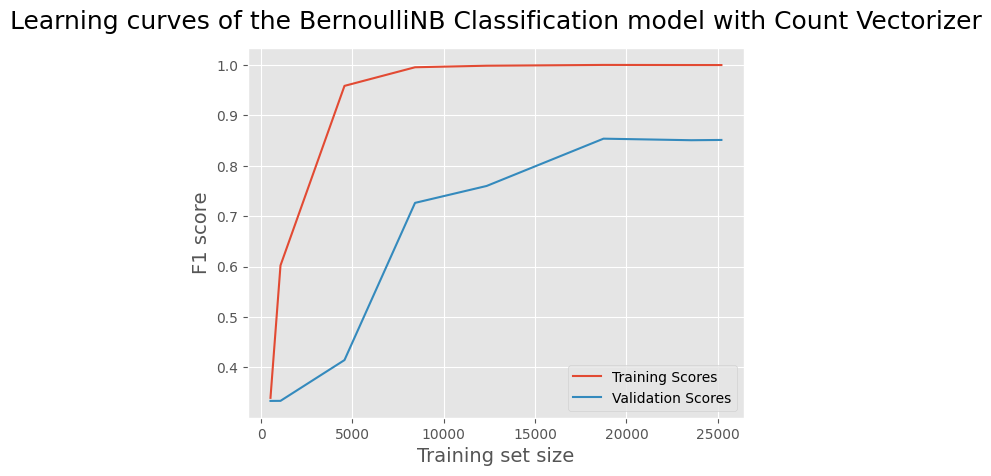

####################################################################################################
BernoulliNB Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      6006
           1       0.89      0.80      0.84      5994

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

####################################################################################################
BernoulliNB Model, Validation score is: 0.8503407420604873
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(BNB_obj, "BernoulliNB", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, BNB_obj.predict(valid_count_vector), average= "macro")
test_score

0.8412927427499639

##### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(BNB_obj, "BernoulliNB", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

BernoulliNB Model, F1-score is: 0.9997142852930023
####################################################################################################

  BernoulliNB Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.8449280690149749
  BernoulliNB Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.0025515296480674156
  BernoulliNB Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.84852113 0.84284362 0.84341946]
####################################################################################################


####################################################################################################
BernoulliNB Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      6006
           1       0.89      0.80      0.84      5994

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

####################################################################################################
BernoulliNB Model, Validation score is: 0.8503407420604873
####################################################################################################


In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  BernoulliNB      Count        0.999714       0.850341
0  BernoulliNB     TF-IDF        0.999714       0.850341

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, BNB_obj.predict(valid_tfidf_vector), average= "macro")
test_score

0.8412927427499639

#### Complement Naive Bayes Classifier model

In [ ]:
# Creating and training the Complement Naive Bayes Classifier.
comNB_obj = ComplementNB()

##### Count Vectorizer

Complement Naive Bayes Model, F1-score is: 0.9997499997318238
####################################################################################################

  Complement Naive Bayes Classification with Count Vectorizer Cross Validation Mean Result is: 0.8569587453891326
  Complement Naive Bayes Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.004815611508866555
  Complement Naive Bayes Classification with Count Vectorizer Cross Validation Score Result is:
[0.85160485 0.86328083 0.85599056]
####################################################################################################


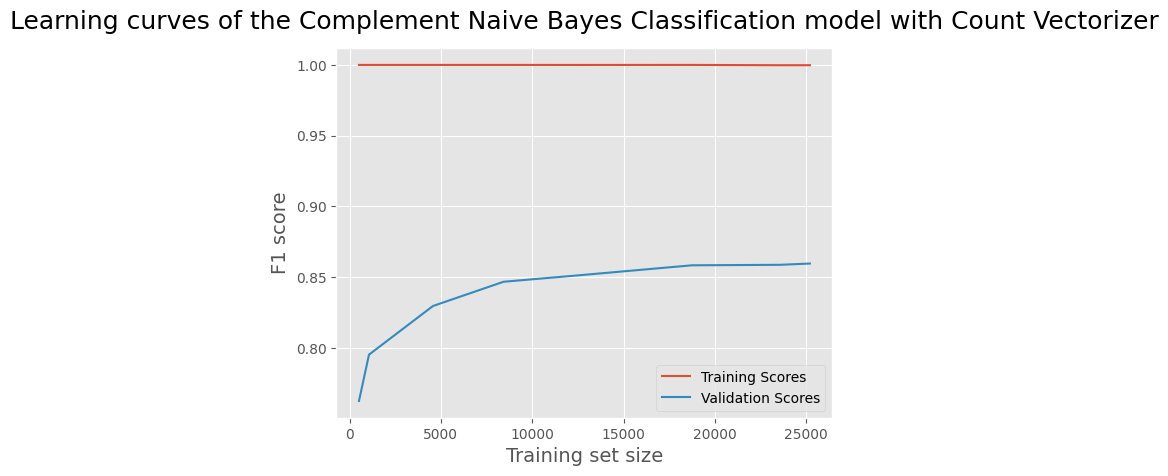

####################################################################################################
Complement Naive Bayes Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      6006
           1       0.86      0.86      0.86      5994

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

####################################################################################################
Complement Naive Bayes Model, Validation score is: 0.8622491954970375
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(comNB_obj, "Complement Naive Bayes", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, comNB_obj.predict(valid_count_vector), average= "macro")
test_score

0.8543842502005017

##### TF-IDF Vectorizer

Complement Naive Bayes Model, F1-score is: 0.9988571407521827
####################################################################################################

  Complement Naive Bayes Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.8637479446595527
  Complement Naive Bayes Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.005857980056003743
  Complement Naive Bayes Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.85868376 0.87195801 0.86060206]
####################################################################################################


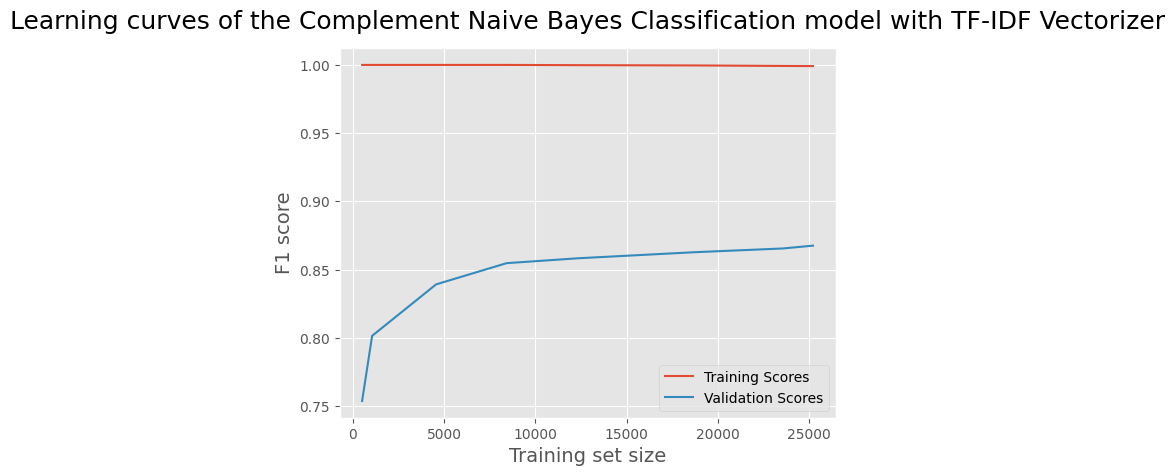

####################################################################################################
Complement Naive Bayes Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      6006
           1       0.86      0.88      0.87      5994

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000

####################################################################################################
Complement Naive Bayes Model, Validation score is: 0.8684941552957909
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(comNB_obj, "Complement Naive Bayes", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0             BernoulliNB      Count        0.999714       0.850341
0             BernoulliNB     TF-IDF        0.999714       0.850341
0  Complement Naive Bayes      Count        0.999750       0.862249
0  Complement Naive Bayes     TF-IDF        0.998857       0.868494

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, comNB_obj.predict(valid_tfidf_vector), average= "macro")
test_score

0.8577913480256139

#### Random Forest Classifier model

In [ ]:
forest_obj = RandomForestClassifier(n_estimators= 100, max_depth= 5, random_state= 42)

##### TF-IDF Vectorizer

Random Forest Model, F1-score is: 0.7560529035276331
####################################################################################################


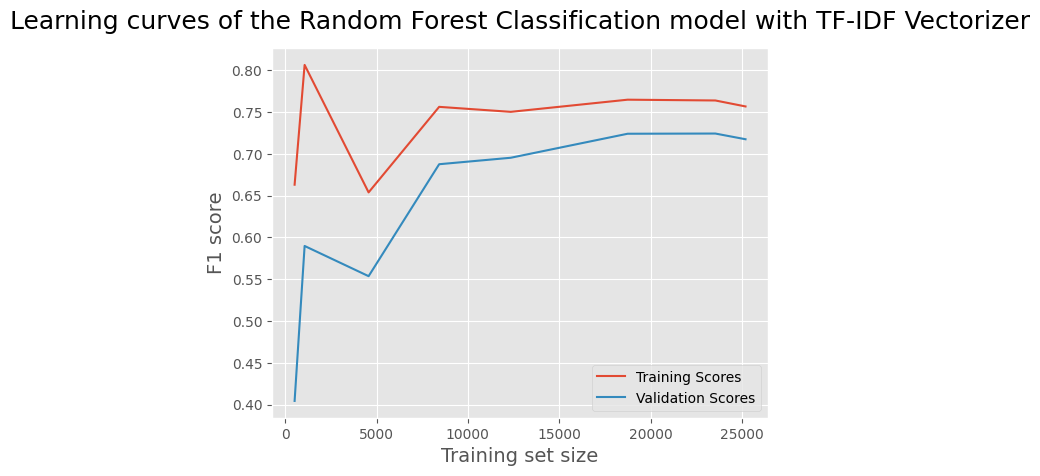

####################################################################################################
Random Forest Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      6006
           1       0.72      0.73      0.73      5994

    accuracy                           0.73     12000
   macro avg       0.73      0.73      0.73     12000
weighted avg       0.73      0.73      0.73     12000

####################################################################################################
Random Forest Model, Validation score is: 0.7269917415001803
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(forest_obj, "Random Forest", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = False, learning_plot_use = True)

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0             BernoulliNB      Count        0.999714       0.850341
0             BernoulliNB     TF-IDF        0.999714       0.850341
0  Complement Naive Bayes      Count        0.999750       0.862249
0  Complement Naive Bayes     TF-IDF        0.998857       0.868494
0           Random Forest     TF-IDF        0.756053       0.726992

**Compute ROC of the best performance**

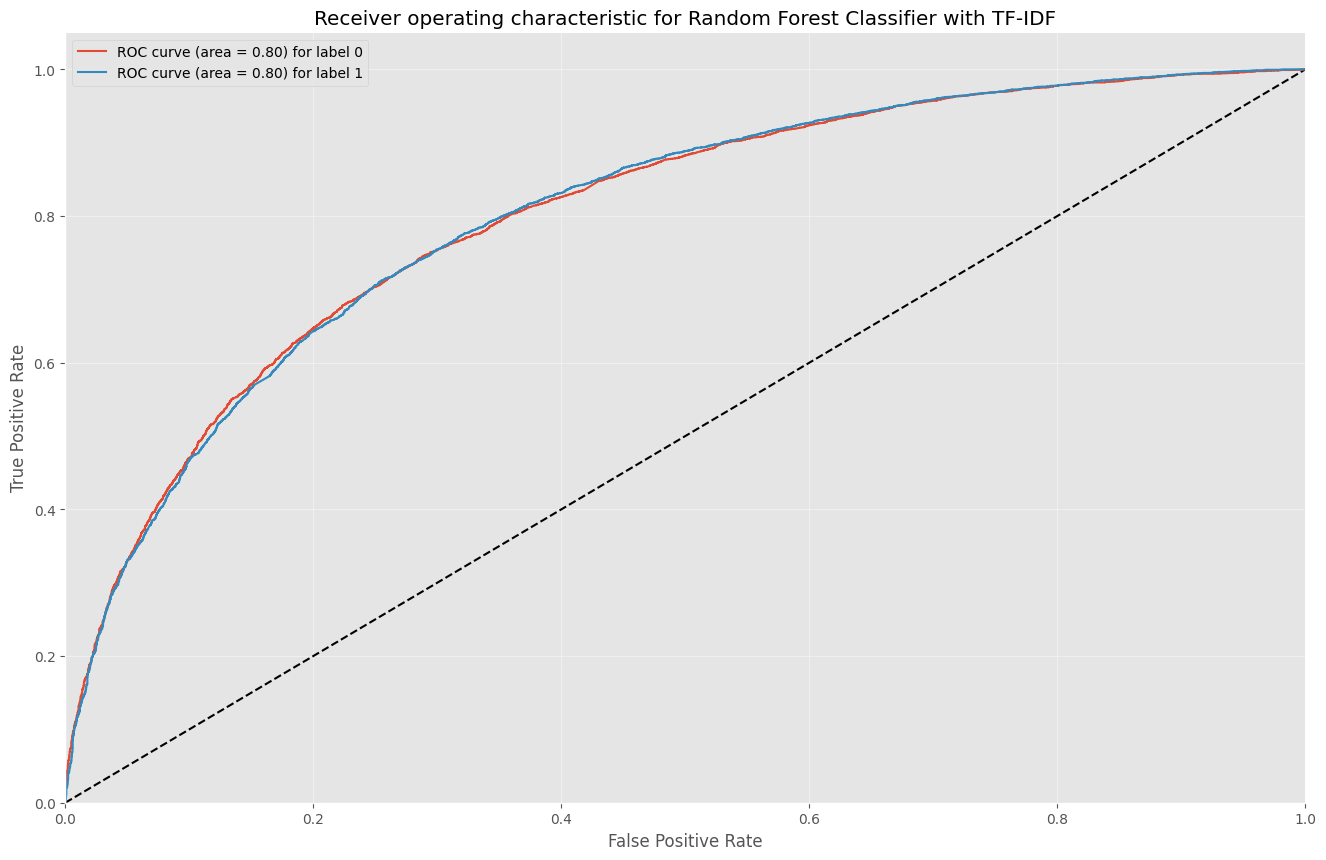

In [ ]:
plot_multiclass_roc("Random Forest", "TF-IDF", forest_obj, tfidf_val_data, tfidf_val_labels, n_classes=2, figsize=(16, 10))

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, forest_obj.predict(valid_tfidf_vector), average= "macro")
test_score

0.7169550637859268

#### SVC Classifier model

In [ ]:
# Create an object the of SVC Classifier.
svc_obj = SVC(kernel='linear', C = 5, class_weight='balanced')

##### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(svc_obj, "SVC", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

SVC Model, F1-score is: 1.0
####################################################################################################
SVC Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      6006
           1       0.86      0.87      0.87      5994

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

####################################################################################################
SVC Model, Validation score is: 0.8646552939517833
####################################################################################################


In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, svc_obj.predict(valid_count_vector), average= "macro")
test_score

0.8603605881724058

##### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(svc_obj, "SVC", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

SVC Model, F1-score is: 1.0
####################################################################################################
SVC Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      6006
           1       0.86      0.89      0.87      5994

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000

####################################################################################################
SVC Model, Validation score is: 0.873058748162691
####################################################################################################


In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0             BernoulliNB      Count        0.999714       0.850341
0             BernoulliNB     TF-IDF        0.999714       0.850341
0  Complement Naive Bayes      Count        0.999750       0.862249
0  Complement Naive Bayes     TF-IDF        0.998857       0.868494
0           Random Forest     TF-IDF        0.756053       0.726992
0                     SVC      Count        1.000000       0.864655
0                     SVC     TF-IDF        1.000000       0.873059

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, svc_obj.predict(valid_tfidf_vector), average= "macro")
test_score

0.862850644351699

In [ ]:
# save the model to disk
# filename save the model to disk
# filename = 'SVC_model.sav'
# joblib.dump(svc_obj, filename)

**Compute ROC of the best performance**

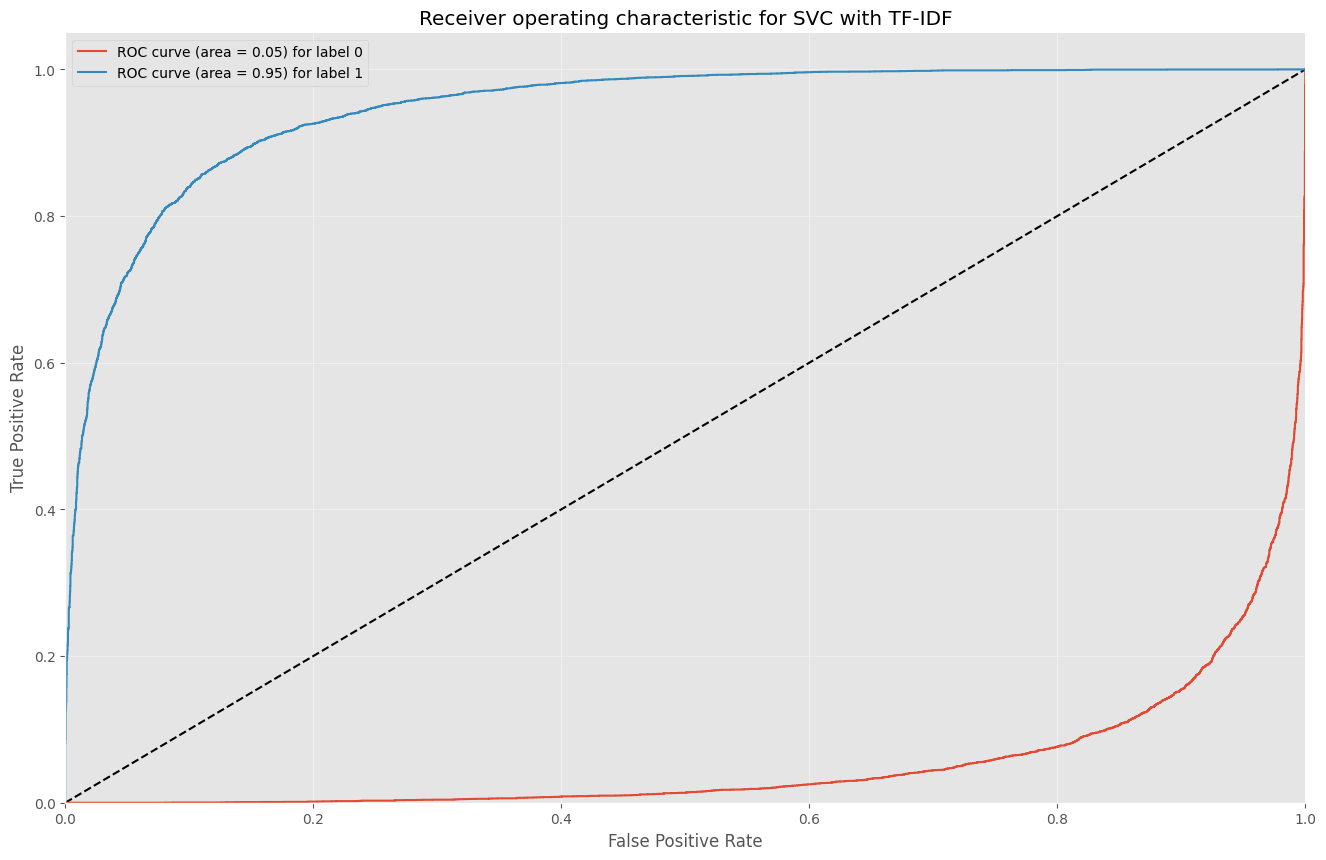

In [ ]:
plot_multiclass_roc("SVC", "TF-IDF", svc_obj, tfidf_val_data, tfidf_val_labels, n_classes=2, figsize=(16, 10))

#### XGBoost Classsifier model

In [ ]:
# # Create an object the of XGBoost Classifier.
# xgb_obj = OneVsOneClassifier(XGBClassifier(learning_rate= 0.1, subsample= 0.25, n_estimators= 90, random_state= 42))

In [ ]:
# Create an object the of XGBoost Classifier.
xgb_obj = XGBClassifier(learning_rate= 0.1, n_estimators= 90, random_state= 42)

##### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(xgb_obj, "XGBoost", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

XGBoost Model, F1-score is: 0.841480000663944
####################################################################################################
XGBoost Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      6006
           1       0.79      0.85      0.82      5994

    accuracy                           0.81     12000
   macro avg       0.82      0.81      0.81     12000
weighted avg       0.82      0.81      0.81     12000

####################################################################################################
XGBoost Model, Validation score is: 0.8139452149587714
####################################################################################################


In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, xgb_obj.predict(valid_count_vector), average= "macro")
test_score

0.8120313949697836

##### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(xgb_obj, "XGBoost", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

XGBoost Model, F1-score is: 0.846626418126317
####################################################################################################
XGBoost Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      6006
           1       0.79      0.85      0.82      5994

    accuracy                           0.81     12000
   macro avg       0.82      0.81      0.81     12000
weighted avg       0.82      0.81      0.81     12000

####################################################################################################
XGBoost Model, Validation score is: 0.8135827056375793
####################################################################################################


In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0             BernoulliNB      Count        0.999714       0.850341
0             BernoulliNB     TF-IDF        0.999714       0.850341
0  Complement Naive Bayes      Count        0.999750       0.862249
0  Complement Naive Bayes     TF-IDF        0.998857       0.868494
0           Random Forest     TF-IDF        0.756053       0.726992
0                     SVC      Count        1.000000       0.864655
0                     SVC     TF-IDF        1.000000       0.873059
0                 XGBoost      Count        0.841480       0.813945
0                 XGBoost     TF-IDF        0.846626       0.813583

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, xgb_obj.predict(valid_tfidf_vector), average= "macro")
test_score

0.8054473067582788

**Compute ROC of the best performance**

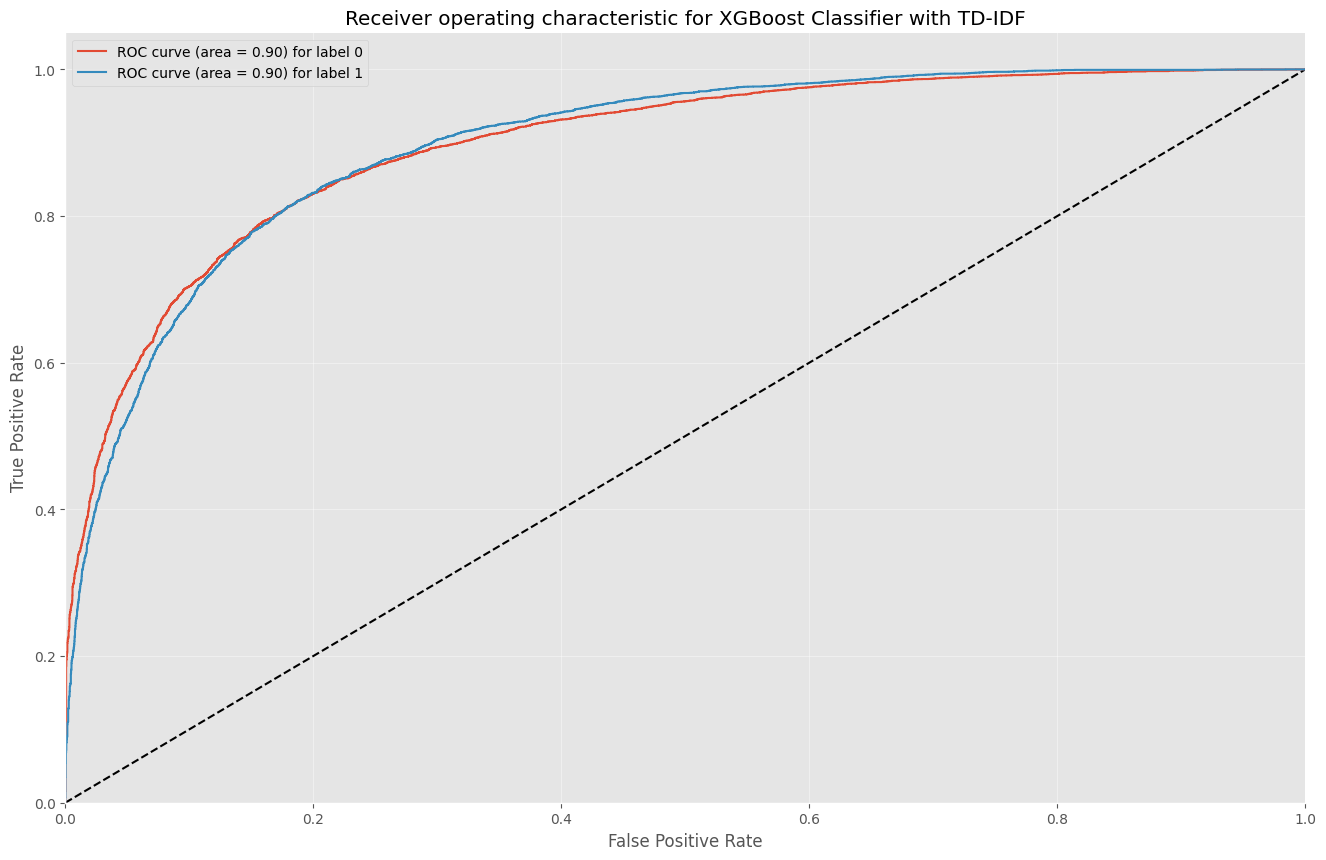

In [ ]:
plot_multiclass_roc("XGBoost", "TD-IDF", xgb_obj, tfidf_val_data, tfidf_val_labels, n_classes=2, figsize=(16, 10))

#### SGD Classifier model

In [ ]:
# Create an object the of SGD Classifier.
sgd_obj = SGDClassifier(penalty='l2', random_state=42)

##### Count Vectorizer

SGD Classifier Model, F1-score is: 0.9998928570279244
####################################################################################################

  SGD Classifier Classification with Count Vectorizer Cross Validation Mean Result is: 0.8539360732129079
  SGD Classifier Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.004854471783736771
  SGD Classifier Classification with Count Vectorizer Cross Validation Score Result is:
[0.85152039 0.86070918 0.84957864]
####################################################################################################


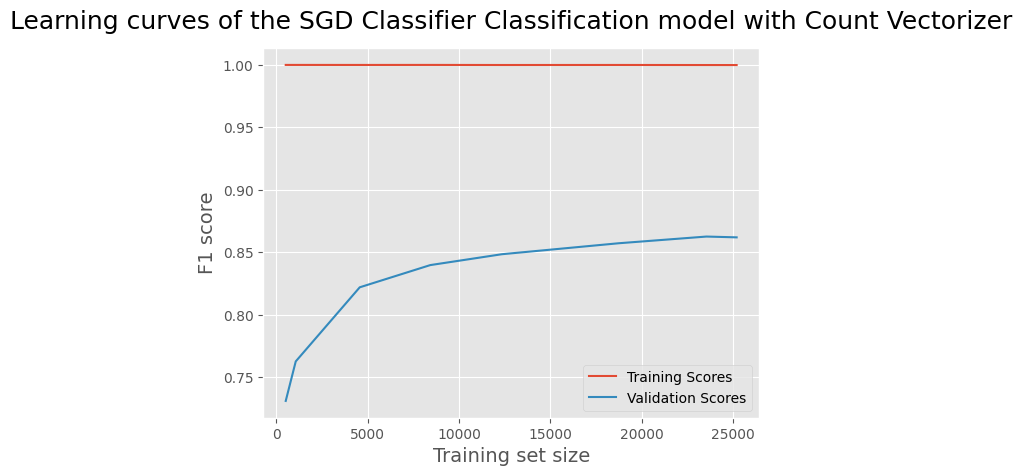

####################################################################################################
SGD Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      6006
           1       0.86      0.87      0.86      5994

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

####################################################################################################
SGD Classifier Model, Validation score is: 0.8634126591561454
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(sgd_obj, "SGD Classifier", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv = pd.concat([results_in_csv, count_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0             BernoulliNB      Count        0.999714       0.850341
0             BernoulliNB     TF-IDF        0.999714       0.850341
0  Complement Naive Bayes      Count        0.999750       0.862249
0  Complement Naive Bayes     TF-IDF        0.998857       0.868494
0           Random Forest     TF-IDF        0.756053       0.726992
0                     SVC      Count        1.000000       0.864655
0                     SVC     TF-IDF        1.000000       0.873059
0                 XGBoost      Count        0.841480       0.813945
0                 XGBoost     TF-IDF        0.846626       0.813583
0          SGD Classifier      Count        0.999893       0.863413

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, sgd_obj.predict(valid_count_vector), average= "macro")
test_score

0.8581550578485286

#### Voting Classifier model

In [ ]:
# vote1 = OneVsOneClassifier(RandomForestClassifier(n_estimators= 100, max_depth= 2, random_state= 42, max_features= 5))
# vote2 = OneVsOneClassifier(XGBClassifier(learning_rate= 0.04, max_depth=2, n_estimators= 100, random_state= 42))
# vote3 = OneVsOneClassifier(SGDClassifier(penalty='l1', random_state=42))
# vote4 = OneVsOneClassifier(DecisionTreeClassifier(max_depth=3, max_features= 6, random_state= 42))
# # Create an object the of Voting Classifier.
# voting_model = VotingClassifier(estimators=[('rf', vote1), ('xgb', vote2), ('sgd', vote3), ('dt', vote4)], voting='hard')

In [ ]:
vote1 = RandomForestClassifier(n_estimators= 80, max_depth= 2, random_state= 42, max_features= 5)
vote2 = XGBClassifier(learning_rate= 0.1, max_depth=2, n_estimators= 30, random_state= 42)
vote3 = SGDClassifier(penalty='l1', random_state=42)
vote4 = DecisionTreeClassifier(max_depth=3, random_state= 42)
# Create an object the of Voting Classifier.
voting_model = VotingClassifier(estimators=[('rf', vote1), ('xgb', vote2), ('sgd', vote3), ('dt', vote4)], voting='hard')

##### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(voting_model, "Voting Classifier", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

Voting Classifier Model, F1-score is: 0.8989106399256672
####################################################################################################
Voting Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      6006
           1       0.85      0.76      0.81      5994

    accuracy                           0.82     12000
   macro avg       0.82      0.82      0.82     12000
weighted avg       0.82      0.82      0.82     12000

####################################################################################################
Voting Classifier Model, Validation score is: 0.815881432712962
####################################################################################################


In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, voting_model.predict(valid_count_vector), average= "macro")
test_score

0.815333341344902

##### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(voting_model, "Voting Classifier", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

Voting Classifier Model, F1-score is: 0.824642842827987
####################################################################################################
Voting Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      6006
           1       0.82      0.81      0.81      5994

    accuracy                           0.81     12000
   macro avg       0.81      0.81      0.81     12000
weighted avg       0.81      0.81      0.81     12000

####################################################################################################
Voting Classifier Model, Validation score is: 0.813830101217035
####################################################################################################


In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv = pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0             BernoulliNB      Count        0.999714       0.850341
0             BernoulliNB     TF-IDF        0.999714       0.850341
0  Complement Naive Bayes      Count        0.999750       0.862249
0  Complement Naive Bayes     TF-IDF        0.998857       0.868494
0           Random Forest     TF-IDF        0.756053       0.726992
0                     SVC      Count        1.000000       0.864655
0                     SVC     TF-IDF        1.000000       0.873059
0                 XGBoost      Count        0.841480       0.813945
0                 XGBoost     TF-IDF        0.846626       0.813583
0          SGD Classifier      Count        0.999893       0.863413
0       Voting Classifier      Count        0.898911       0.815881
0       Voting Classifier     TF-IDF        0.824643       0.813830

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, voting_model.predict(valid_tfidf_vector), average= "macro")
test_score

0.8083984978442231

#### Multinomial NB model

In [ ]:
# Create Multinomial NB object.
MultinomialNB_obj = MultinomialNB()

##### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(MultinomialNB_obj, "Multinomial NB", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

Multinomial NB Model, F1-score is: 0.9997499997318238
####################################################################################################
Multinomial NB Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      6006
           1       0.86      0.86      0.86      5994

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

####################################################################################################
Multinomial NB Model, Validation score is: 0.8621658052029493
####################################################################################################


In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

##### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(MultinomialNB_obj, "Multinomial NB", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

Multinomial NB Model, F1-score is: 0.9988928549949394
####################################################################################################
Multinomial NB Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      6006
           1       0.86      0.88      0.87      5994

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000

####################################################################################################
Multinomial NB Model, Validation score is: 0.8686621975331106
####################################################################################################


In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0             BernoulliNB      Count        0.999714       0.850341
0             BernoulliNB     TF-IDF        0.999714       0.850341
0  Complement Naive Bayes      Count        0.999750       0.862249
0  Complement Naive Bayes     TF-IDF        0.998857       0.868494
0           Random Forest     TF-IDF        0.756053       0.726992
0                     SVC      Count        1.000000       0.864655
0                     SVC     TF-IDF        1.000000       0.873059
0                 XGBoost      Count        0.841480       0.813945
0                 XGBoost     TF-IDF        0.846626       0.813583
0          SGD Classifier      Count        0.999893       0.863413
0       Voting Classifier      Count        0.898911       0.815881
0       Voting Classifier     TF-IDF        0.824643       0.813830
0          Multinomial NB      Count        0.999750       0.862166
0          Multinomial NB     TF-IDF        0.998893       0.868662

In [ ]:
# # Save the model.
# pickle.dump(MultinomialNB_obj, open('MultinomialNB_obj.pkl', 'wb'))

#### Ada Boost Classifier model

In [ ]:
# Create an object the of Ada Boost Classifier.
# ada_obj = OneVsOneClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=70, random_state=42))

In [ ]:
# Create an object the of Ada Boost Classifier.
ada_obj = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=5, random_state=42)

##### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(ada_obj, "AdaBoost", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

AdaBoost Model, F1-score is: 0.6857107206003077
####################################################################################################
AdaBoost Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.84      0.49      0.62      5945
           1       0.64      0.91      0.75      5972

    accuracy                           0.70     11917
   macro avg       0.74      0.70      0.69     11917
weighted avg       0.74      0.70      0.69     11917

####################################################################################################
AdaBoost Model, Validation score is: 0.6865191351837572
####################################################################################################


In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

##### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(ada_obj, "AdaBoost", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

AdaBoost Model, F1-score is: 0.6906230000735112
####################################################################################################
AdaBoost Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.83      0.52      0.64      5945
           1       0.65      0.89      0.75      5972

    accuracy                           0.71     11917
   macro avg       0.74      0.71      0.70     11917
weighted avg       0.74      0.71      0.70     11917

####################################################################################################
AdaBoost Model, Validation score is: 0.6951126993475831
####################################################################################################


In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  AdaBoost     TF-IDF        0.690623       0.695113
0  AdaBoost      Count        0.685711       0.686519

**Compute ROC of the best performance**

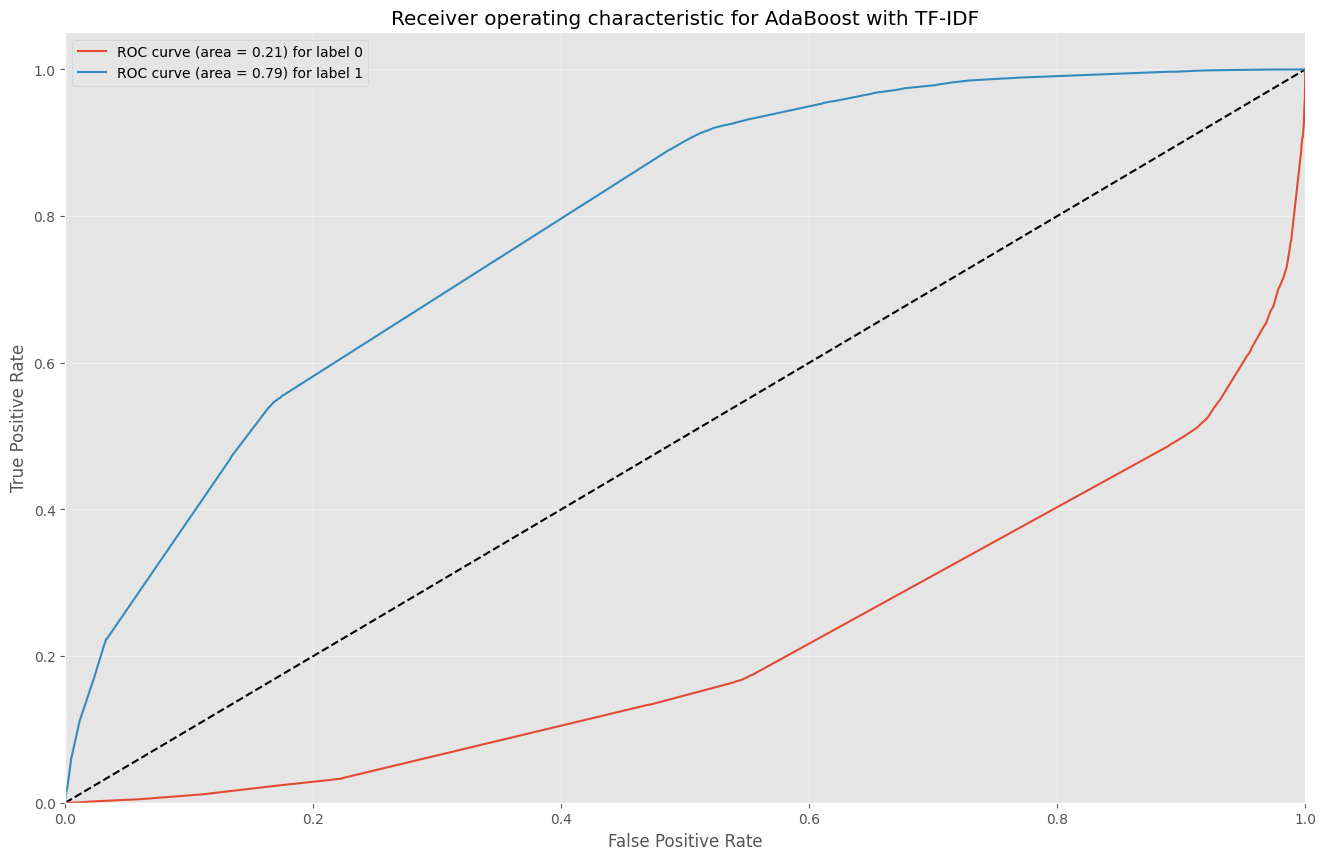

In [ ]:
plot_multiclass_roc("AdaBoost", "TF-IDF", ada_obj, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, ada_obj.predict(valid_tfidf_vector), average= "macro")
test_score

#### Gradient Boosting Classsifier model

In [ ]:
gb_obj = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 2, n_estimators= 10, random_state= 42)

##### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(gb_obj, "Gradient Boosting", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

Gradient Boosting Model, F1-score is: 0.6354420438580082
####################################################################################################
Gradient Boosting Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.88      0.39      0.54      5945
           1       0.61      0.95      0.74      5972

    accuracy                           0.67     11917
   macro avg       0.74      0.67      0.64     11917
weighted avg       0.74      0.67      0.64     11917

####################################################################################################
Gradient Boosting Model, Validation score is: 0.639427800292596
####################################################################################################


In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, gb_obj.predict(valid_count_vector), average= "macro")
test_score

0.6286112302358109

##### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(gb_obj, "Gradient Boosting", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

Gradient Boosting Model, F1-score is: 0.6331460687393844
####################################################################################################
Gradient Boosting Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.88      0.38      0.53      5945
           1       0.61      0.95      0.74      5972

    accuracy                           0.66     11917
   macro avg       0.74      0.66      0.64     11917
weighted avg       0.74      0.66      0.64     11917

####################################################################################################
Gradient Boosting Model, Validation score is: 0.6350505955016654
####################################################################################################


In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  Gradient Boosting      Count        0.635442       0.639428
0  Gradient Boosting     TF-IDF        0.633146       0.635051

**Compute ROC of the best performance**

In [ ]:
plot_multiclass_roc("Gradient Boosting", "TF-IDF", gb_obj, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, gb_obj.predict(valid_tfidf_vector), average= "macro")
test_score

0.625108099684371

#### Bagging Classifier model

In [ ]:
# Create an object the of Bagging Classifier.
bag_object = BaggingClassifier(GradientBoostingClassifier(learning_rate= 0.1, max_depth= 2, n_estimators= 5, random_state= 42),
                               n_estimators=5, bootstrap=True, random_state=42)

##### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(bag_object, "Bagging Classifier", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

Bagging Classifier Model, F1-score is: 0.6153437578829117
####################################################################################################
Bagging Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.88      0.35      0.50      5945
           1       0.59      0.95      0.73      5972

    accuracy                           0.65     11917
   macro avg       0.74      0.65      0.62     11917
weighted avg       0.74      0.65      0.62     11917

####################################################################################################
Bagging Classifier Model, Validation score is: 0.6156394720204812
####################################################################################################


In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

##### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(bag_object, "Bagging Classifier", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

Bagging Classifier Model, F1-score is: 0.6128473089395199
####################################################################################################
Bagging Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.88      0.34      0.49      5945
           1       0.59      0.95      0.73      5972

    accuracy                           0.65     11917
   macro avg       0.74      0.65      0.61     11917
weighted avg       0.74      0.65      0.61     11917

####################################################################################################
Bagging Classifier Model, Validation score is: 0.6124577557292796
####################################################################################################


In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0   Gradient Boosting      Count        0.635442       0.639428
0   Gradient Boosting     TF-IDF        0.633146       0.635051
0  Bagging Classifier      Count        0.615344       0.615639
0  Bagging Classifier     TF-IDF        0.612847       0.612458

**Compute ROC of the best performance**

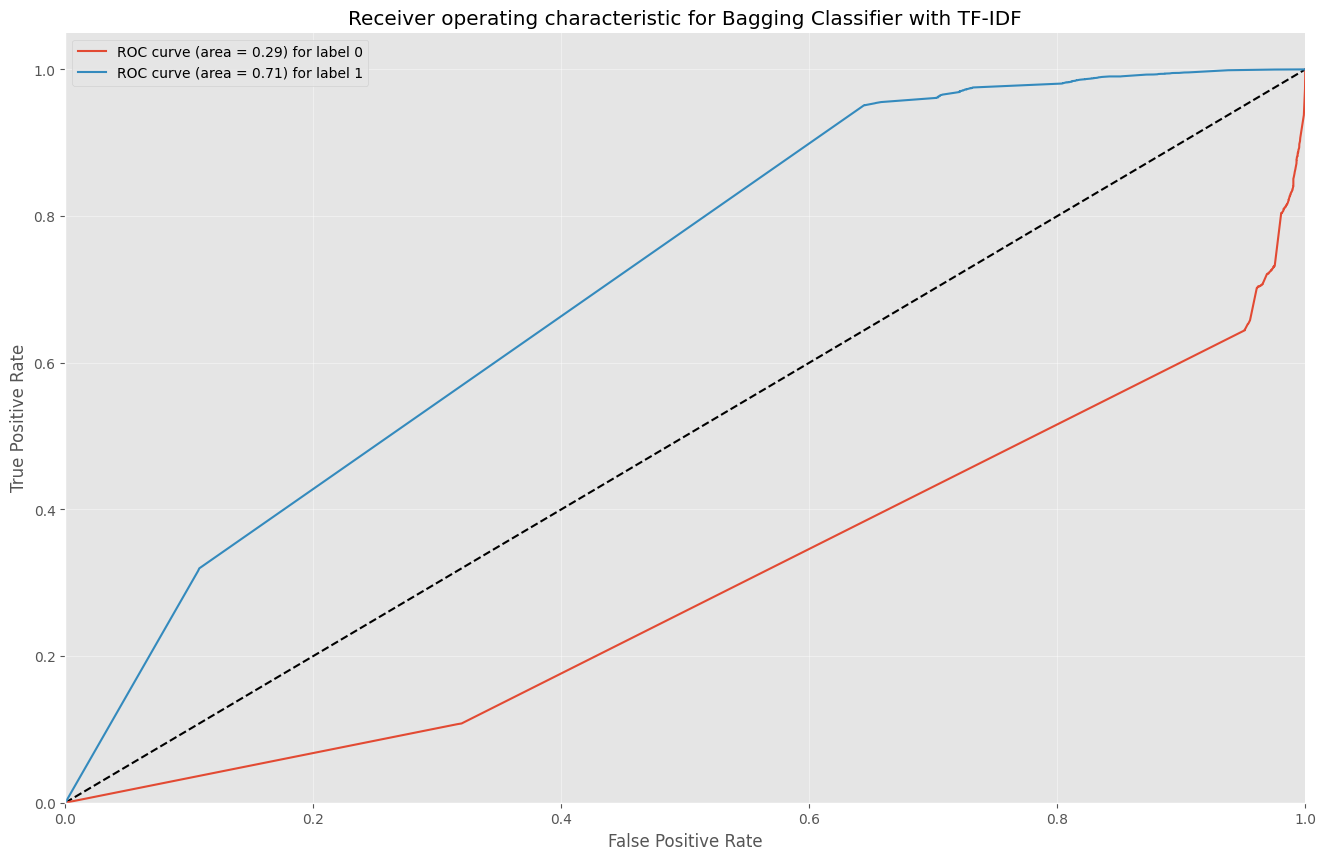

In [ ]:
plot_multiclass_roc("Bagging Classifier", "TF-IDF", bag_object, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, bag_object.predict(valid_tfidf_vector), average= "macro")
test_score

0.6079480257186095

#### Logistic Regression model

In [ ]:
# Create an object the of Logistic Regression.
lg_obj = LogisticRegression(max_iter = 300, C=5, penalty='l2', solver='lbfgs', random_state=42)

##### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(lg_obj, "Logistic Regression", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

Logistic Regression Model, F1-score is: 1.0
####################################################################################################
Logistic Regression Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      6006
           1       0.86      0.88      0.87      5994

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000

####################################################################################################
Logistic Regression Model, Validation score is: 0.8668982903118729
####################################################################################################


In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, lg_obj.predict(valid_count_vector), average= "macro")
test_score

0.8615531274268216

##### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(lg_obj, "Logistic Regression", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, lg_obj.predict(valid_tfidf_vector), average= "macro")
test_score

0.8572519931565845

**Compute ROC of the best performance**

In [ ]:
plot_multiclass_roc("Logistic Regression", "TF-IDF", lg_obj, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

#### Stacking Classifier model

In [ ]:
estimators = [('rf', RandomForestClassifier(n_estimators=70, max_depth= 2, random_state= 42)),
              ('rg', RidgeClassifier(solver = 'lsqr', random_state = 42)),
              ('svr', SVC(random_state=42)),
              ('sgd', SGDClassifier(penalty='l1', random_state=42))]
stack_obj = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression(max_iter= 3000)
)

##### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(stack_obj, "Stacking Classifer", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

##### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(stack_obj, "Stacking Classifer", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

**Compute ROC of the best performance**

In [ ]:
plot_multiclass_roc("Stacking Classifer", "TF-IDF", stack_obj, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

#### Ridge Classifier model

In [ ]:
ridge_obj = RidgeClassifier(solver = 'lsqr', random_state = 42)

##### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(ridge_obj, "Ridge Classifer", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Ridge Classifer Model, F1-score is: 1.0
####################################################################################################

  Ridge Classifer Classification with Count Vectorizer Cross Validation Mean Result is: 0.8526004872869576
  Ridge Classifer Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.0028802847802592434
  Ridge Classifer Classification with Count Vectorizer Cross Validation Score Result is:
[0.85040579 0.85666963 0.85072605]
####################################################################################################
Ridge Classifer Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      5945
           1       0.85      0.87      0.86      5972

    accuracy                           0.86     11917
   macro avg       0.86      0.86      0.86     11917
weighted avg       0.86      0.86      0.86     11917

####################

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, ridge_obj.predict(valid_count_vector), average= "macro")
test_score

0.85501146268473

##### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(ridge_obj, "Ridge Classifer", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Ridge Classifer Model, F1-score is: 0.9996403633626003
####################################################################################################

  Ridge Classifer Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.8630462120531055
  Ridge Classifer Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.003205697837861131
  Ridge Classifer Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.86593148 0.86463197 0.85857518]
####################################################################################################
Ridge Classifer Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      5945
           1       0.85      0.89      0.87      5972

    accuracy                           0.87     11917
   macro avg       0.87      0.87      0.87     11917
weighted avg       0.87      0.87      0.87     11917

###

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0    Decision Tree      Count        0.745273       0.710070
0    Decision Tree     TF-IDF        0.748243       0.707732
0  Ridge Classifer      Count        1.000000       0.860669
0  Ridge Classifer     TF-IDF        0.999640       0.867441

**Evaluate on validation set**

In [ ]:
test_score = f1_score(valid_labels_data, ridge_obj.predict(valid_tfidf_vector), average= "macro")
test_score

0.8619832988674535

**Compute ROC of the best performance**

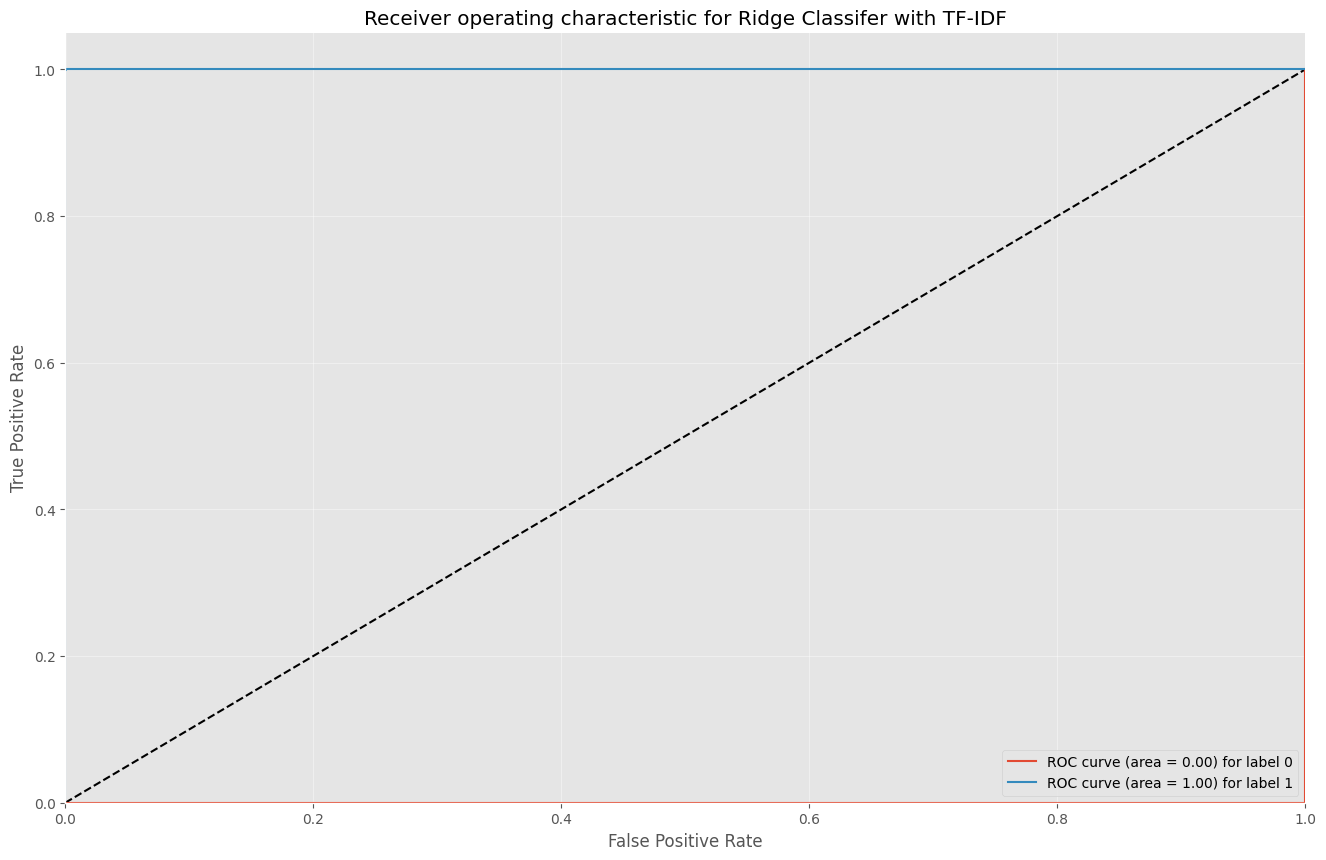

In [ ]:
plot_multiclass_roc("Ridge Classifer", "TF-IDF", ridge_obj, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

In [ ]:
# pickle.dump(ridge_obj, open('Ridge Classifer.pkl', 'wb'))

### Error Analysis

#### Algorithm Graph

In [ ]:
def error_analysis(model, x, y):
    ''' 
    This function show the confusion matrix of the model
    and the error the model make 
    Arge:
    model-- model we want to use
    x-- training data
    y-- testing data
    Return:
    Plot analysis of all models we used.
    '''
    # got predicted values.
    y_pred = cross_val_predict(model, x, y, cv=3)
    # got confusion matrix.
    conf_mx = confusion_matrix(y, y_pred)
    # show the matrix.
    plt.figure(figsize= (15, 10))
    fig, axs = plt.subplots(1, 2)
    
    sns.heatmap(conf_mx, ax = axs[0])
    axs[0].grid(False)
    axs[0].set_title("Confusion Matrix")
    axs[0].set_xlabel("Ture Class")
    axs[0].set_ylabel("Predicted Class")

    # got sum each row in confusion matrix.
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    # divide each value by the corresponding sum.
    norm_conf_mx = conf_mx / row_sums
    # fill diagonal in confusion matrix.
    np.fill_diagonal(norm_conf_mx, 0)
    # show the matrix.
    
    sns.heatmap(norm_conf_mx, ax = axs[1])
    axs[1].grid(False)
    axs[1].set_title("error ratio")
    axs[1].set_xlabel("Ture Class")
    axs[1].set_ylabel("Predicted Class")
    fig.tight_layout()
    return plt.show()

**Now it's time to see the variety of algorithm results in a graph**

In [ ]:
plt.figure(figsize=(10, 5))
# visualizing the training Scores of all the models.
results_in_csv.sort_values(by=['F1 test score'], ascending= True)
sns.lineplot(y= results_in_csv['Algorithm'], x= results_in_csv['F1 train score'], label= "Training Scores", dashes=False, markers=True)
sns.lineplot(y= results_in_csv['Algorithm'], x= results_in_csv['F1 test score'], label= "Testing Scores", dashes=False, markers=True)
plt.yticks(range(len(results_in_csv['Algorithm'])))
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Algorithms results.
results_in_csv.set_index("Algorithm")

#### **Confusion matrix analysis**

In [ ]:
# Analyse the best classifier using confusion matrix.
error_analysis(lg_obj, tfidf_training_data, tfidf_training_labels)

**Discussion Stage**
* The process of confusion matrix was Iterable.

**Analyze the Best Models and Their Errors**

In [ ]:
# check important features of the best model.
#feature_importances = xgb_model.feature_importances_
feature_importances = [] 
for clf in gb_obj.estimators_:
    feature_importances.append(clf.feature_importances_)
feature_importances = np.mean(feature_importances, axis=0)
feature_importances

# for coef, col in enumerate(tfidf_training_data):
#     print(f"{col}:  {ridge_obj.coef_[coef]}")

**Discussion Stage**
* This stage was iterabel stage, between different best models and chain feature elimination to get the best results.

### Parameters Choosing

#### Halving Grid Search CV

**Note:** This is an iterative step and I will loop over a specific range of values depends on elimination values recursively.

**I will choose the best model with the best vectorizer**

##### XGBoost Classifier Grid Search

In [ ]:
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
              }
search = HalvingGridSearchCV(XGBClassifier(random_state = 42), param_grid, resource='n_samples', max_resources= 'auto', random_state=42).fit(tfidf_training_data, tfidf_training_labels)  

In [ ]:
best_model_xgb = search.best_estimator_
best_model_xgb

In [ ]:
xgb_train_score_halving = f1_score(tfidf_training_labels, best_model_xgb.predict(tfidf_training_data), average= "weighted")
xgb_test_score_halving = f1_score(tfidf_val_labels, best_model_xgb.predict(tfidf_val_data), average= "weighted")
display(xgb_train_score_halving)
display(xgb_test_score_halving)

**Discussion Stage**
* We have to loop over these values to determine the best of it, then decide the best estimator taken the possibility of overfit into consideration, but this step will take long time depend on the parameters that I tried (using a specific range of values depends on elimination values recursively).

##### Logistic Reggression Classifier Grid Search

In [ ]:
# Define grid search.
param_grid = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty' : ['l2','l1'],
    'C' : [0.01, 0.1, 0.5, 1.0, 5.0, 10]}

search = HalvingGridSearchCV(LogisticRegression(random_state = 42), param_grid, resource='n_samples', max_resources= 'auto', random_state=42).fit(tfidf_training_data, tfidf_training_labels)  
# Summarize results.
print("Best: %f using %s" % (search.best_score_, search.best_params_))
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
params = search.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self

Best: 0.864008 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.519024 (0.034986) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.519024 (0.034986) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.519024 (0.034986) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.512195 (0.037911) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.525854 (0.032708) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.525854 (0.032708) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.526829 (0.034216) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}
0.520000 (0.034438) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.671220 (0.095221) with: {'C': 0.5, 'penalty': 'l2', '

In [ ]:
best_model_lr = search.best_estimator_
best_model_lr

LogisticRegression(C=10, random_state=42, solver='newton-cg')

In [ ]:
lr_train_score_halving = f1_score(tfidf_training_labels, best_model_lr.predict(tfidf_training_data), average= "macro")
lr_test_score_halving = f1_score(tfidf_val_labels, best_model_lr.predict(tfidf_val_data), average= "macro")
display(lr_train_score_halving)
display(lr_test_score_halving)

0.9998921090270603

0.8665295795849017

**Compute ROC of the best performance**

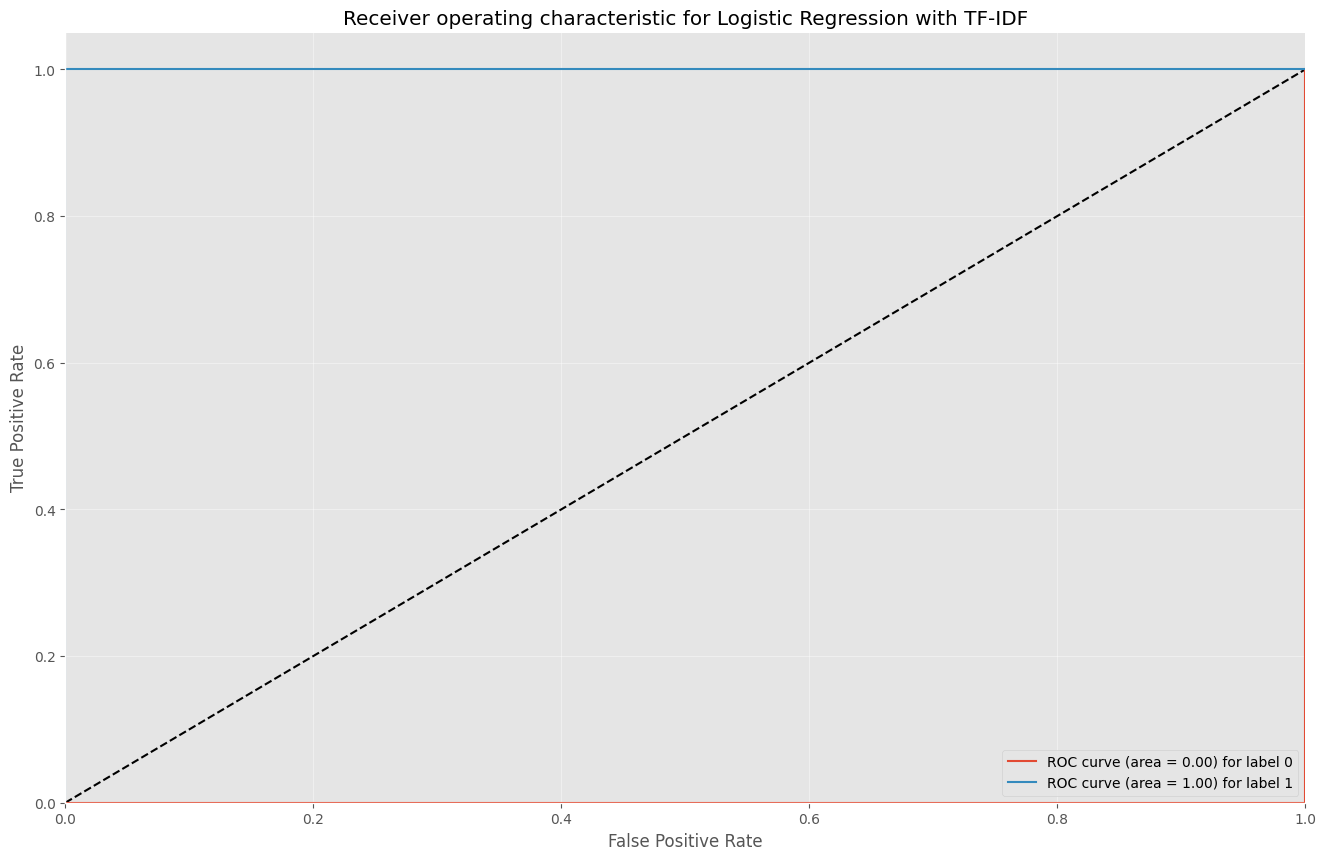

In [ ]:
plot_multiclass_roc("Logistic Regression", "TF-IDF", best_model_lr, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

##### Ridge Classifier Grid Search

In [ ]:
param_grid = {
    'alpha' : np.arange(0, 1, 0.1),
    'solver' : ['lbfgs', 'sparse_cg', 'saga'],
    'max_iter' : [100, 500]
}

search = HalvingGridSearchCV(RidgeClassifier(), param_grid, resource='n_samples', max_resources= 'auto', random_state=42).fit(tfidf_training_data, tfidf_training_labels)  
# Summarize results.
print("Best: %f using %s" % (search.best_score_, search.best_params_))
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
params = search.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1424, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 825, in fit
    raise ValueError(
ValueError: 'lbfgs' solver can be used only

Best: 0.869227 using {'alpha': 0.0, 'max_iter': 500, 'solver': 'sparse_cg'}
nan (nan) with: {'alpha': 0.0, 'max_iter': 100, 'solver': 'lbfgs'}
0.801951 (0.015912) with: {'alpha': 0.0, 'max_iter': 100, 'solver': 'sparse_cg'}
nan (nan) with: {'alpha': 0.0, 'max_iter': 100, 'solver': 'saga'}
nan (nan) with: {'alpha': 0.0, 'max_iter': 500, 'solver': 'lbfgs'}
0.801951 (0.015912) with: {'alpha': 0.0, 'max_iter': 500, 'solver': 'sparse_cg'}
nan (nan) with: {'alpha': 0.0, 'max_iter': 500, 'solver': 'saga'}
nan (nan) with: {'alpha': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
0.802927 (0.014003) with: {'alpha': 0.1, 'max_iter': 100, 'solver': 'sparse_cg'}
nan (nan) with: {'alpha': 0.1, 'max_iter': 100, 'solver': 'saga'}
nan (nan) with: {'alpha': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}
0.802927 (0.014003) with: {'alpha': 0.1, 'max_iter': 500, 'solver': 'sparse_cg'}
nan (nan) with: {'alpha': 0.1, 'max_iter': 500, 'solver': 'saga'}
nan (nan) with: {'alpha': 0.2, 'max_iter': 100, 'solver': 'lbfgs'}
0

In [ ]:
best_model_rc = search.best_estimator_
best_model_rc

RidgeClassifier(alpha=0.0, max_iter=500, solver='sparse_cg')

In [ ]:
rc_train_score_halving = f1_score(tfidf_training_labels, best_model_rc.predict(tfidf_training_data), average= "macro")
rc_test_score_halving = f1_score(tfidf_val_labels, best_model_rc.predict(tfidf_val_data), average= "macro")
display(rc_train_score_halving)
display(rc_test_score_halving)

1.0

0.8750918329700212

**Compute ROC of the best performance**

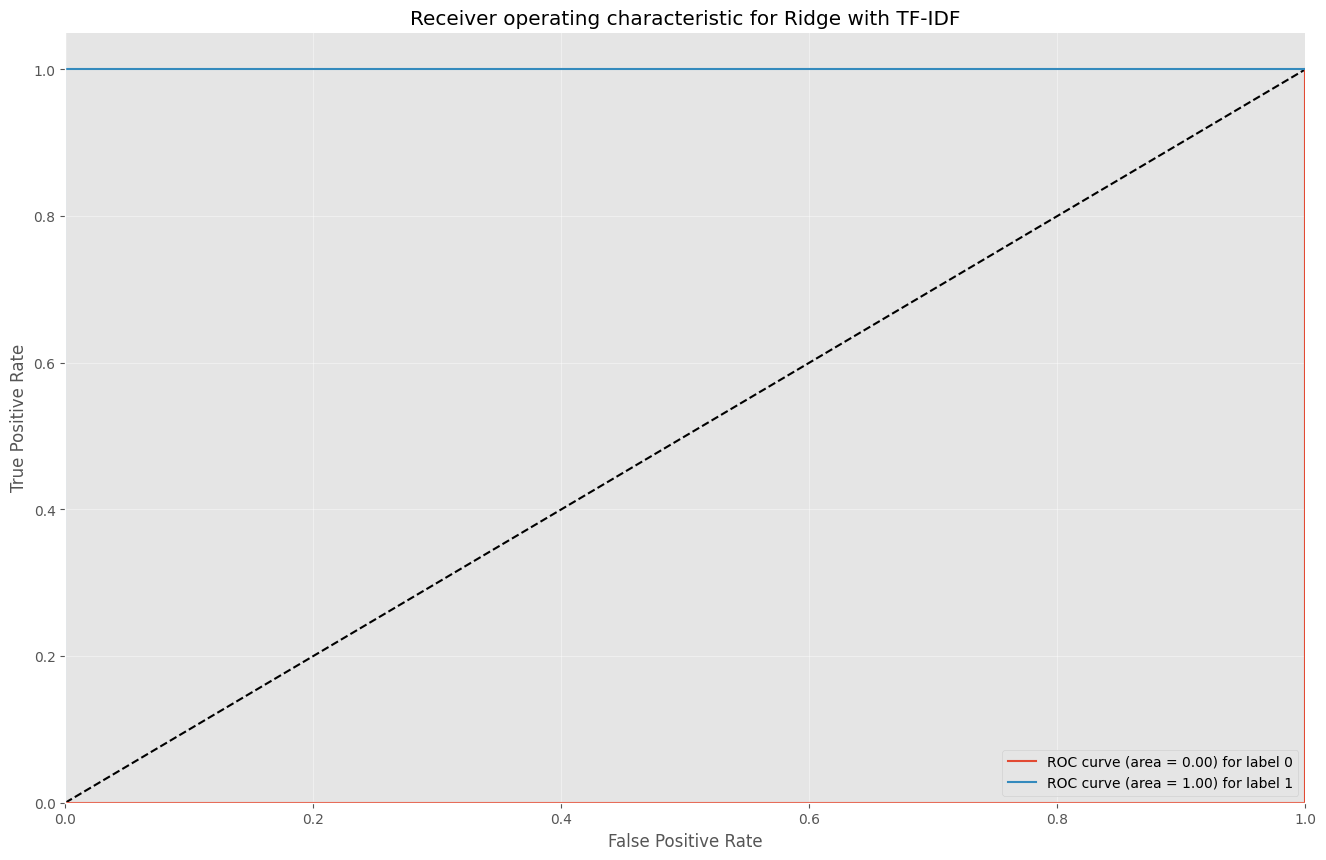

In [ ]:
plot_multiclass_roc("Ridge", "TF-IDF", best_model_rc, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

##### Multinomial NB

In [ ]:
grid_params ={
    'alpha':[10**x for x in range(-4,4)]
    }
param_grid = {
              'alpha' : [math.log(x,10) for x in grid_params["alpha"]]
              }

search = HalvingGridSearchCV(MultinomialNB(), param_grid, resource='n_samples', max_resources= 'auto', random_state=42).fit(tfidf_training_data, tfidf_training_labels)  
# Summarize results.
print("Best: %f using %s" % (search.best_score_, search.best_params_))
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
params = search.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, 

Best: 0.862559 using {'alpha': 1.0}
nan (nan) with: {'alpha': -3.999999999999999}
nan (nan) with: {'alpha': -2.9999999999999996}
nan (nan) with: {'alpha': -1.9999999999999996}
nan (nan) with: {'alpha': -0.9999999999999998}
0.746357 (0.007296) with: {'alpha': 0.0}
0.847383 (0.005955) with: {'alpha': 1.0}
0.843605 (0.006090) with: {'alpha': 2.0}
0.841230 (0.005715) with: {'alpha': 2.9999999999999996}
0.859897 (0.004621) with: {'alpha': 2.9999999999999996}
0.861696 (0.004276) with: {'alpha': 2.0}
0.862559 (0.004038) with: {'alpha': 1.0}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.74635726 0.84738262
 0.84360496 0.84123044 0.85989724 0.86169568 0.86255902]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan        nan 1.         1.
 0.99970326 0.99886701 0.9910353  0.99580089 0.99928966]
  warnings.warn(


In [ ]:
best_model_nb = search.best_estimator_
best_model_nb

MultinomialNB()

In [ ]:
nb_train_score_halving = f1_score(tfidf_training_labels, best_model_nb.predict(tfidf_training_data), average= "macro")
nb_test_score_halving = f1_score(tfidf_val_labels, best_model_nb.predict(tfidf_val_data), average= "macro")
display(nb_train_score_halving)
display(nb_test_score_halving)

0.9989210917902325

0.8629995066767698

**Compute ROC of the best performance**

In [ ]:
plot_multiclass_roc("Multinomial NB", "TF-IDF", best_model_nb, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

##### SGD Grid Search

In [ ]:
alpha = [10**x for x in range(-4,4)]
penalty = ["l1","l2"]
params ={'alpha':alpha,'penalty':penalty}
alpha_log = [math.log(x,10) for x in params["alpha"]]

In [ ]:
search = HalvingGridSearchCV(SGDClassifier(), params, resource='n_samples', max_resources= 'auto', random_state=42).fit(tfidf_training_data, tfidf_training_labels)  
# Summarize results.
print("Best: %f using %s" % (search.best_score_, search.best_params_))
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
params = search.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

Best: 0.858597 using {'alpha': 0.0001, 'penalty': 'l2'}
0.811021 (0.022727) with: {'alpha': 0.0001, 'penalty': 'l1'}
0.834684 (0.015814) with: {'alpha': 0.0001, 'penalty': 'l2'}
0.657374 (0.054478) with: {'alpha': 0.001, 'penalty': 'l1'}
0.713776 (0.086138) with: {'alpha': 0.001, 'penalty': 'l2'}
0.508266 (0.013467) with: {'alpha': 0.01, 'penalty': 'l1'}
0.524473 (0.030366) with: {'alpha': 0.01, 'penalty': 'l2'}
0.509238 (0.012819) with: {'alpha': 0.1, 'penalty': 'l1'}
0.497245 (0.014255) with: {'alpha': 0.1, 'penalty': 'l2'}
0.497569 (0.015613) with: {'alpha': 1, 'penalty': 'l1'}
0.490762 (0.012819) with: {'alpha': 1, 'penalty': 'l2'}
0.501783 (0.015700) with: {'alpha': 10, 'penalty': 'l1'}
0.497569 (0.015613) with: {'alpha': 10, 'penalty': 'l2'}
0.494003 (0.014619) with: {'alpha': 100, 'penalty': 'l1'}
0.491734 (0.013467) with: {'alpha': 100, 'penalty': 'l2'}
0.490762 (0.012819) with: {'alpha': 1000, 'penalty': 'l1'}
0.494327 (0.014748) with: {'alpha': 1000, 'penalty': 'l2'}
0.505343

In [ ]:
best_model_sgd = search.best_estimator_
best_model_sgd

SGDClassifier()

In [ ]:
sgd_train_score_halving = f1_score(tfidf_training_labels, best_model_sgd.predict(tfidf_training_data), average= "macro")
sgd_test_score_halving = f1_score(tfidf_val_labels, best_model_sgd.predict(tfidf_val_data), average= "macro")
display(sgd_train_score_halving)
display(sgd_test_score_halving)

0.9588489406667497

0.8560120566247992

**Compute ROC of the best performance**

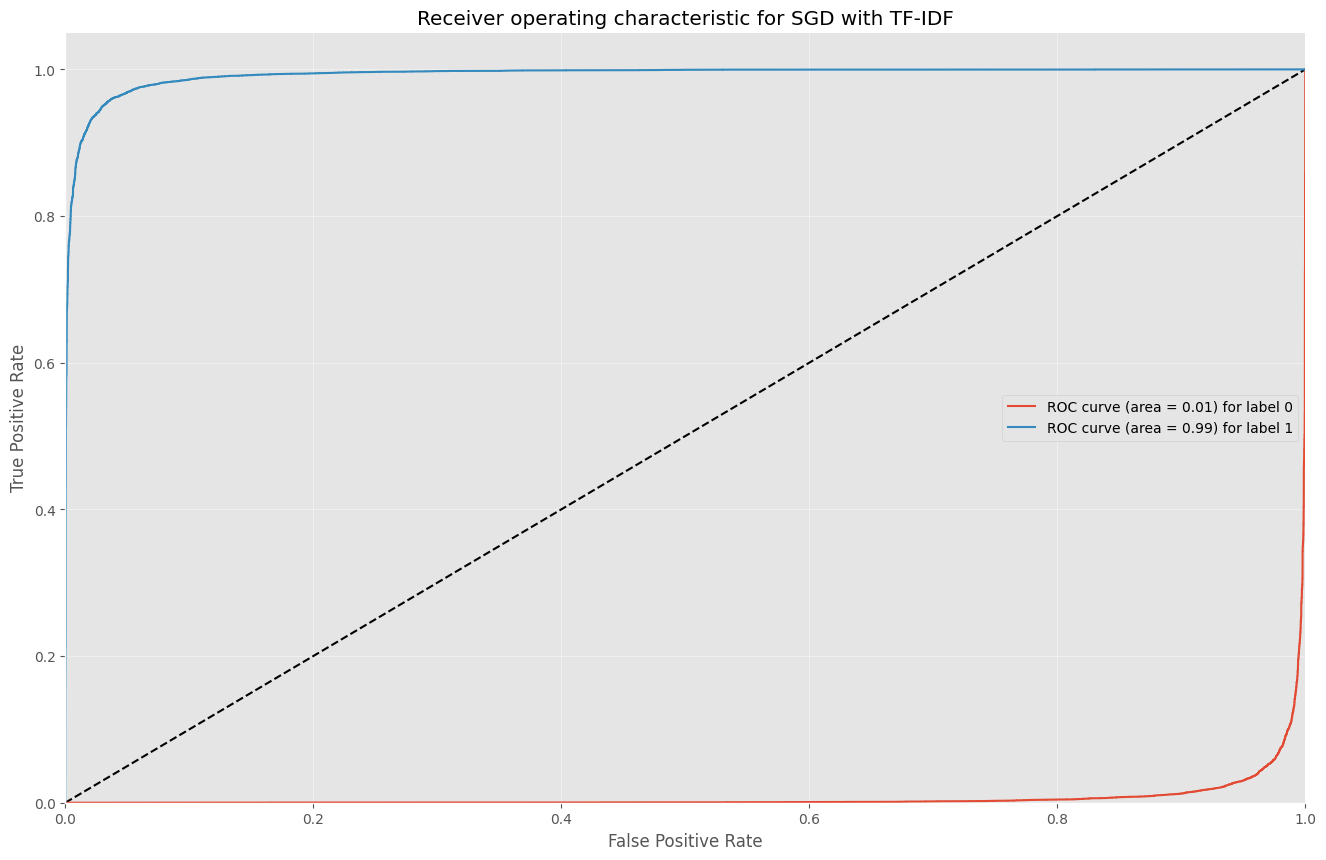

In [ ]:
plot_multiclass_roc("SGD", "TF-IDF", best_model_sgd, tfidf_training_data, tfidf_training_labels, n_classes = 2, figsize=(16, 10))

## Deep Learning Models

### Keras Preprocessing

In [ ]:
def split_by_data(training_vector, labels_data, test_size):
  # Split the data using stratified split.
  training_data, val_data, training_labels, val_labels = train_test_split(training_vector, labels_data, 
                                                    test_size= test_size, random_state= 42, shuffle=True, stratify= labels_data
                                                    )
  return training_data, val_data, training_labels, val_labels

In [ ]:
# lemmatizer = WordNetLemmatizer()
# def data_preprocessing(data):
#   '''
#   Process data cleaning and data preprocessing in a single function.
#   '''
#   # split by nltk.word_tokenizer
#   reviews = []
#   for raw in tqdm(data):
#       # remove html tag
#       text = BeautifulSoup(raw, 'lxml').get_text()
#       # remove non-letters
#       letters_only = re.sub('[^a-zA-Z]', ' ', text)
#       # split(lowercase)
#       words = word_tokenize(letters_only.lower())
#       # get stoplist words
#       stops = set(stopwords.words('english'))
#       # remove stopwords / get non-stopwords list
#       non_stopwords = [word for word in words if not word in stops]
#       # lemmatize word to its lemma
#       lemma_words = [lemmatizer.lemmatize(word) for word in non_stopwords]    
#       reviews.append(lemma_words)
#   return reviews

**In case of using data preprocessing function**

In [ ]:
# # Data cleaning for train set.
# %time 
# fetched_train_data_proc = data_preprocessing(train_data)

In [ ]:
# # re-joined.
# train_df = pd.DataFrame(fetched_train_data_proc)

# train_df = train_df[train_df.columns[0:]].apply(
#     lambda x: ' '.join(x.dropna().astype(str)),
#     axis=1
# )
# print(train_df.head())
# print(train_df.shape)

In [ ]:
# # Data cleaning for valid set.
# %time 
# fetched_valid_data_proc = data_preprocessing(valid_data)

In [ ]:
# Split data into training and val set.
train_data, valid_data, train_labels, valid_labels = split_by_data(training_data, train_labels_data, 0.3)

In [ ]:
train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)

In [ ]:
# # re-joined.
# valid_df = pd.DataFrame(fetched_valid_data_proc)
# # df.apply(' '.join)
# valid_df = valid_df[valid_df.columns[0:]].apply(
#     lambda x: ' '.join(x.dropna().astype(str)),
#     axis=1
# )
# print(valid_df.head())
# print(valid_df.shape)

In [ ]:
# # Data cleaning for evaluate set.
# %time 
# evaluate_data_proc = data_preprocessing(fetched_valid_data.Reviews.values)
# evaluate_labels_data = fetched_valid_data.Sentiments

In [ ]:
# # Lemmatized and re-joined.
# evaluate_df = pd.DataFrame(evaluate_data_proc)

# evaluate_df = evaluate_df[evaluate_df.columns[0:]].apply(
#     lambda x: ' '.join(x.dropna().astype(str)),
#     axis=1
# )
# print(evaluate_df.head())
# print(evaluate_df.shape)

In [ ]:
# extract label columns and to_categorical.
# train_data_proc = train_df
# valid_data_proc = valid_df
# evaluate_data_proc = evaluate_df

**In case of using process text data function**

In [ ]:
# Data cleaning for evaluate set.
%time 
evaluate_data_proc = process_text_data(fetched_valid_data.review)
evaluate_labels_data = fetched_valid_data.sentiment
evaluate_labels_data = np.array(evaluate_labels_data)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

<ipython-input-35-862a90022783>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text


Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

In [ ]:
train_data_proc = train_data
valid_data_proc = valid_data
num_classes = 1

In [ ]:
# found unique words.
unique_results = set()
# train_data.str.lower().str.split().apply(results.update)
# print(len(results))
train_data.str.lower().apply(word_tokenize).apply(unique_results.update)
print(len(unique_results))

20877


In [ ]:
# Is the total vocabulary size + padding token
unique_words = len(unique_results) + 1
print(unique_words)

20878


In [ ]:
# Keras len max initialization.
len_max = 512

In [ ]:
oov_tok = '<OOV>'
trunc_type = 'pre'
padding_type = 'pre'
embedding_dim = 128
# Transfer data to keras tokenizer

tokenizer = Tokenizer(oov_token = oov_tok, char_level = False)
tokenizer.fit_on_texts(train_data_proc)

train_data_preprocess = tokenizer.texts_to_sequences(train_data_proc)
val_data = tokenizer.texts_to_sequences(valid_data_proc)
evaluate_data = tokenizer.texts_to_sequences(evaluate_data_proc)

train_data_preprocess = keras.utils.pad_sequences(train_data_preprocess, maxlen = len_max, padding = padding_type,
                      truncating = trunc_type)
val_data = keras.utils.pad_sequences(val_data, maxlen = len_max, padding = padding_type,
                      truncating = trunc_type)
evaluate_data = keras.utils.pad_sequences(evaluate_data, maxlen = len_max, padding = padding_type,
                      truncating = trunc_type)

train_data_preprocess.shape, val_data.shape, evaluate_data.shape

((27806, 512), (11917, 512), (4998, 512))

**In case of GloVe embedding**

In [ ]:
vectorizer = TextVectorization(max_tokens= unique_words, output_sequence_length = len_max)
train_text_ds = tf.data.Dataset.from_tensor_slices(train_data_proc).batch(128)
vectorizer.adapt(train_text_ds)

vectorizer.get_vocabulary()[:5]
output = vectorizer([["the cat sat on the mat"]])
output.numpy()[0, :6]

array([2111,  749, 7740,    1, 2111, 6483])

In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

**Build essantial functions**

In [ ]:
def plot_acc_loss_curves(history):
  '''
  This function visualises accuracy and loss scores and plot it.
  Args: history indicates training and validation accuracy and loss history.
  Returns: plot a visualise of accuracy and loss curves.
  '''
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(15, 5))
  plt.style.use('ggplot')
  plt.rcParams['figure.figsize'] = [16, 5]
  plt.rcParams['font.size'] = 14
  plt.rcParams['axes.grid'] = True
  plt.rcParams['figure.facecolor'] = 'white'

  # plot loss
  plt.subplot(1, 2, 1)
  plt.plot(loss, label = 'Training Loss')
  plt.plot(val_loss, label = 'Validation Loss')
  plt.legend()
  plt.ylabel('Cross Entropy')
  plt.title(f'Training and Validation Loss. \nTrain Loss: {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
  plt.xlabel('Epoch')

  # plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(accuracy, label = 'Training Accuracy')
  plt.plot(val_accuracy, label = 'Validation Accuracy')
  plt.legend()
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {(str(accuracy[-1]))} \nValidation Accuracy: {str(val_accuracy[-1])}')
  return plt.show()

In [ ]:
# # Define Learning Rate schedule.
# initial_learning_rate = 0.001
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps= 2,
#     decay_rate=0.16,
#     staircase=True
#     )
# # Apply learning rate scheduler.
# reduce_lr = keras.callbacks.LearningRateScheduler(lr_schedule)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.0001, patience=3, verbose=0)

In [ ]:
lr_finder = LRFinder(min_lr=1e-7, max_lr=1e-4)

In [ ]:
early_stopping = EarlyStopping(min_delta = 0.001,
                               monitor = 'val_loss',
                               restore_best_weights=True,
                               patience = 5
                               )

# callback = [early_stopping, lr_finder]
callback = [early_stopping, reduce_lr]

In [ ]:
# Batch
BATCH_SIZE = 32
# Number of steps in training and validation sets.
STEP_SIZE_TRAIN = len(train_data) // BATCH_SIZE
STEP_SIZE_VALID = len(valid_data) // BATCH_SIZE
# Number of Epochs
num_epochs = 8

### GRU Model

In [ ]:
GRU_model = keras.Sequential()
GRU_model.add(Embedding(unique_words, embedding_dim, input_length = len_max))
GRU_model.add(GRU(units = 16, return_sequences = True))
GRU_model.add(Dropout(0.5))
GRU_model.add(GRU(units = 32, return_sequences = True))
GRU_model.add(Dropout(0.5))
GRU_model.add(GlobalMaxPool1D())
GRU_model.add(Dense(128, activation='relu'))
GRU_model.add(Dense(num_classes, activation='sigmoid'))
##### Print Performance Summary
print("")
print('-------------------- Model Summary --------------------')
GRU_model.summary() # print model summary


-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 128)          2672384   
                                                                 
 gru (GRU)                   (None, 512, 16)           7008      
                                                                 
 dropout (Dropout)           (None, 512, 16)           0         
                                                                 
 gru_1 (GRU)                 (None, 512, 32)           4800      
                                                                 
 dropout_1 (Dropout)         (None, 512, 32)           0         
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  

In [ ]:
##### Compile the model
GRU_model.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.experimental.Adam(),
             metrics = ['accuracy'])

In [ ]:
##### Fit the model on the dataset
%%time
GRU_history = GRU_model.fit(train_data_preprocess, train_labels,
                    validation_data = (val_data, valid_labels),
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = num_epochs,
                    batch_size = BATCH_SIZE,
                    verbose = 1,
                    callbacks = callback
                    )

Epoch 1/8
868/868 [==============================] - 123s 130ms/step - loss: 0.4108 - accuracy: 0.8070 - val_loss: 0.4429 - val_accuracy: 0.8374 - lr: 0.0010
Epoch 2/8
868/868 [==============================] - 48s 56ms/step - loss: 0.2751 - accuracy: 0.8883 - val_loss: 0.4333 - val_accuracy: 0.8448 - lr: 0.0010
Epoch 3/8
868/868 [==============================] - 37s 42ms/step - loss: 0.2032 - accuracy: 0.9204 - val_loss: 0.3955 - val_accuracy: 0.8390 - lr: 0.0010
Epoch 4/8
868/868 [==============================] - 34s 39ms/step - loss: 0.1477 - accuracy: 0.9448 - val_loss: 0.3827 - val_accuracy: 0.8339 - lr: 0.0010
Epoch 5/8
868/868 [==============================] - 32s 37ms/step - loss: 0.1108 - accuracy: 0.9604 - val_loss: 0.3986 - val_accuracy: 0.8255 - lr: 0.0010
Epoch 6/8
868/868 [==============================] - 34s 39ms/step - loss: 0.0820 - accuracy: 0.9708 - val_loss: 0.4084 - val_accuracy: 0.8234 - lr: 0.0010
Epoch 7/8
868/868 [==============================] - 32s 37ms/

**Discussion Stage**
* We can clearly see the overfit that happened after the second epoch.
* I suggest to stop training starting from the third epoch.

In [ ]:
print("")
print('-------------------- Weights and Biases --------------------')
print("Too many parameters to print but you can use the code provided if needed")
print("")

for layer in GRU_model.layers:
   print(layer.name)
   for item in layer.get_weights():
       print("  ", item)
print("")


-------------------- Weights and Biases --------------------
Too many parameters to print but you can use the code provided if needed

embedding
   [[ 0.028115    0.00842725  0.006941   ...  0.00943143  0.03652465
   0.01926883]
 [ 0.00497843  0.02196619 -0.00860719 ... -0.01429452  0.01805035
  -0.03065522]
 [ 0.02255454 -0.04433171  0.04822388 ... -0.02043409  0.03632095
  -0.03335337]
 ...
 [-0.10702363 -0.02203045 -0.09740061 ...  0.09708726 -0.03105052
   0.064865  ]
 [ 0.04520053 -0.01905496  0.04519609 ... -0.08205427  0.11813267
  -0.0718048 ]
 [-0.02918169 -0.0841217  -0.08678732 ...  0.07656757 -0.07024919
   0.03773882]]
gru
   [[ 0.22363086 -0.04471058 -0.00503413 ...  0.01121892 -0.05716749
   0.1355726 ]
 [-0.11049683 -0.02518299 -0.06511566 ...  0.31507832 -0.14521976
   0.0830894 ]
 [ 0.16147321 -0.09234767  0.18309171 ... -0.21829124  0.01237303
  -0.09550609]
 ...
 [-0.09699599 -0.1871315   0.12400293 ...  0.17571081  0.19437978
   0.10724438]
 [ 0.0179549   0.039396

**Plot model history**

In [ ]:
plot_acc_loss_curves(GRU_history)

In [ ]:
# Evaluate the model on the test data using "evaluate"
print('-------------------- Evaluation on Valid Data --------------------')
results = GRU_model.evaluate(evaluate_data, evaluate_labels_data)
print("")

-------------------- Evaluation on Valid Data --------------------
157/157 [==============================] - 2s 14ms/step - loss: 0.5218 - accuracy: 0.7991



In [ ]:
# clear_session()
keras.backend.clear_session()

In [ ]:
# Delete model from RAM
del GRU_model

### LSTM

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(unique_words, embedding_dim, input_length = len_max))
LSTM_model.add(LSTM(units=64, return_sequences=True))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(LSTM(units=32, return_sequences=True))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(LSTM(units=16, return_sequences=True))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(GlobalMaxPool1D())
LSTM_model.add(Dropout(0.5))
LSTM_model.add(Dense(num_classes, activation='sigmoid'))
LSTM_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 128)          2672384   
                                                                 
 lstm (LSTM)                 (None, 512, 64)           49408     
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 512, 32)           12416     
                                                                 
 dropout_1 (Dropout)         (None, 512, 32)           0         
                                                                 
 lstm_2 (LSTM)               (None, 512, 16)           3136      
                                                                 
 dropout_2 (Dropout)         (None, 512, 16)           0

In [ ]:
##### Fit the model on the dataset.
%%time
LSTM_history = LSTM_model.fit(train_data_preprocess, train_labels,
                    validation_data = (val_data, valid_labels),
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = num_epochs,
                    batch_size = BATCH_SIZE,
                    verbose = 1,
                    callbacks = callback
                    )

Epoch 1/8
868/868 [==============================] - 108s 117ms/step - loss: 0.4681 - accuracy: 0.7776 - val_loss: 0.4475 - val_accuracy: 0.8442 - lr: 0.0010
Epoch 2/8
868/868 [==============================] - 60s 69ms/step - loss: 0.3228 - accuracy: 0.8733 - val_loss: 0.4115 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 3/8
868/868 [==============================] - 48s 56ms/step - loss: 0.2543 - accuracy: 0.9026 - val_loss: 0.3813 - val_accuracy: 0.8408 - lr: 0.0010
Epoch 4/8
868/868 [==============================] - 50s 57ms/step - loss: 0.2117 - accuracy: 0.9218 - val_loss: 0.3814 - val_accuracy: 0.8359 - lr: 0.0010
Epoch 5/8
868/868 [==============================] - 49s 56ms/step - loss: 0.1708 - accuracy: 0.9377 - val_loss: 0.3952 - val_accuracy: 0.8324 - lr: 0.0010
Epoch 6/8
868/868 [==============================] - 43s 50ms/step - loss: 0.1514 - accuracy: 0.9446 - val_loss: 0.3970 - val_accuracy: 0.8356 - lr: 0.0010
Epoch 7/8
868/868 [==============================] - 47s 54ms/

**Discussion Stage**
* We can clearly see the overfit that happened after the second epoch.
* I suggest to stop training starting from the third epoch.

**Plot model history**

In [ ]:
plot_acc_loss_curves(LSTM_history)

In [ ]:
# Evaluate the model on the test data using "evaluate"
print('-------------------- Evaluation on Valid Data --------------------')
results = LSTM_model.evaluate(evaluate_data, evaluate_labels_data)
print("")

-------------------- Evaluation on Valid Data --------------------
157/157 [==============================] - 3s 17ms/step - loss: 0.3954 - accuracy: 0.8315



In [ ]:
# clear_session()
keras.backend.clear_session()

In [ ]:
# Delete model from RAM
del LSTM_model

### Bi-LSTM Model

**Using Pretrained embedding layer**

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-05-27 19:05:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-05-27 19:05:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-27 19:05:22--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/glove.6B.100d.txt"
)

embeddings_index = {}
with open(path_to_glove_file, encoding="utf-8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 13279 words (362 misses)


In [ ]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [ ]:
BiLSTM_model = Sequential()
BiLSTM_model.add(Input(shape=(None,), dtype="int64"))
BiLSTM_model.add(embedding_layer)
BiLSTM_model.add(Dropout(0.5))
BiLSTM_model.add(Bidirectional(LSTM(32, return_sequences=True)))
BiLSTM_model.add(Dropout(0.5))
BiLSTM_model.add(Bidirectional(LSTM(64, return_sequences=False)))
BiLSTM_model.add(Dropout(0.5))
BiLSTM_model.add(Dense(128,activation = 'relu'))
BiLSTM_model.add(Dropout(0.5))
BiLSTM_model.add(Dense(num_classes, activation = 'sigmoid'))

BiLSTM_model.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.experimental.Adam(),
             metrics = ['accuracy'])

BiLSTM_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         1364300   
                                                                 
 dropout_4 (Dropout)         (None, None, 100)         0         
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 64)         34048     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, None, 64)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [ ]:
# Plot model summary.
keras.utils.plot_model(BiLSTM_model, show_shapes=True)

In [ ]:
%%time
BiLSTM_history = BiLSTM_model.fit(train_data_preprocess, train_labels,
                    validation_data = (val_data, valid_labels),
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = num_epochs,
                    batch_size = BATCH_SIZE,
                    verbose = 1,
                    callbacks = callback
                    )

Epoch 1/50
868/868 [==============================] - 70s 72ms/step - loss: 0.6734 - accuracy: 0.5772 - val_loss: 0.6367 - val_accuracy: 0.6339 - lr: 0.0010
Epoch 2/50
868/868 [==============================] - 59s 68ms/step - loss: 0.6350 - accuracy: 0.6458 - val_loss: 0.5717 - val_accuracy: 0.7089 - lr: 0.0010
Epoch 3/50
868/868 [==============================] - 59s 67ms/step - loss: 0.6067 - accuracy: 0.6735 - val_loss: 0.5281 - val_accuracy: 0.7385 - lr: 0.0010
Epoch 4/50
868/868 [==============================] - 57s 65ms/step - loss: 0.5735 - accuracy: 0.7034 - val_loss: 0.5125 - val_accuracy: 0.7466 - lr: 0.0010
Epoch 5/50
868/868 [==============================] - 57s 65ms/step - loss: 0.5488 - accuracy: 0.7218 - val_loss: 0.4766 - val_accuracy: 0.7680 - lr: 0.0010
Epoch 6/50
868/868 [==============================] - 58s 67ms/step - loss: 0.5354 - accuracy: 0.7364 - val_loss: 0.4948 - val_accuracy: 0.7721 - lr: 0.0010
Epoch 7/50
868/868 [==============================] - 56s 

**Discussion Stage**
* We can clearly see the improvement in performance, but it is slow.
* There is no overfit using BiLSTM.

In [ ]:
# Encode the Document.
pickle.dump(BiLSTM_model, open('BiLSTM_model_obj.pkl', 'wb'))

**Plot model history**

In [ ]:
plot_acc_loss_curves(BiLSTM_history)

In [ ]:
# Evaluate the model on the test data using "evaluate"
print('-------------------- Evaluation on Valid Data --------------------')
results = BiLSTM_model.evaluate(evaluate_data, evaluate_labels_data)
print("")

-------------------- Evaluation on Valid Data --------------------
157/157 [==============================] - 4s 25ms/step - loss: 0.4798 - accuracy: 0.7917



In [ ]:
# clear_session()
keras.backend.clear_session()

In [ ]:
# Delete model from RAM
del BiLSTM_model

## Transformers

### Roberta-Base with TensorFlow

In [ ]:
# minimal cleaning because we're using a deep learning model that can
# learn from different variations and shapes of words
# def clean(t, punc = True, lower = True):

#     if lower is True:
#         t = t.lower()
#     # punctuation removal
#     if punc is True:
#         t = t.translate(str.maketrans('', '', string.punctuation))
        
#     # removing extra space and letters
#     t = re.sub("\s+", ' ', t)
#     t = re.sub("\b\w\b", '', t)
#     return t

# delete the unwanted columns
# def delete(df_list, columns):
#     for df in df_list:
#         df.drop(columns = columns, inplace = True)

# train_data['cleaned_text'] = train_data["Reviews"].apply(lambda x: clean(x, punc = True, lower = True))
# valid_data['cleaned_text'] = valid_data["Reviews"].apply(lambda x: clean(x, punc = True, lower = True))

# delete([train_data, valid_data], ['Reviews'])

In [ ]:
models = {#'roberta-large':(RobertaTokenizer,'roberta-large',TFRobertaModel),
          'roberta-base':(RobertaTokenizer,'roberta-base',TFRobertaModel),
          #'bert-large':(BertTokenizer, 'bert-large-uncased', TFBertModel),
          #'bert-base':(BertTokenizer, 'bert-base-uncased', TFBertModel),
          #'xlnet':(XLNetTokenizer, 'xlnet-large-cased', TFXLNetModel),
         }

tokenizer, model_type, model_name = models['roberta-base']

In [ ]:
# !pip install sentencepiece

In [ ]:
def make_inputs(tokenizer, model_type, serie, max_len= 512):

    tokenizer = tokenizer.from_pretrained(model_type, lowercase=True )
    tokenized_data = [tokenizer.encode_plus(text, max_length=max_len, 
                                            padding='max_length', 
                                            add_special_tokens=True,
                                            truncation = True) for text in serie]

    
    input_ids = np.array([text['input_ids'] for text in tokenized_data])
    attention_mask = np.array([text['attention_mask'] for text in tokenized_data])
    
    return input_ids, attention_mask

input_ids_train, attention_mask_train = make_inputs(tokenizer, model_type, training_data)

In [ ]:
##### TPU or no TPU
def init_model(model_name, model_type, num_labels, Tpu = 'on', max_len = 512):
# ------------------------------------------------ with TPU --------------------------------------------------------------#
    if Tpu == 'on':
        # a few lines of code to get our tpu started and our data distributed on it
        resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(resolver)
        tf.tpu.experimental.initialize_tpu_system(resolver)
        # print("All devices: ", tf.config.list_logical_devices('TPU'))

        strategy = tf.distribute.experimental.TPUStrategy(resolver)
        with strategy.scope():

            model_ = model_name.from_pretrained(model_type)
            # inputs.
            input_ids = tf.keras.Input(shape = (max_len, ), dtype = 'int32')
            attention_masks = tf.keras.Input(shape = (max_len,), dtype = 'int32')
            
            outputs = model_([input_ids, attention_masks])

            if 'xlnet' in model_type:
                # cls is the last token in xlnet tokenization.
                outputs = outputs[0]
                cls_output = tf.squeeze(outputs[:, -1:, :], axis=1)
            else:
                cls_output = outputs[1]

            final_output = tf.keras.layers.Dense(num_labels, activation = 'sigmoid')(cls_output)
            model = tf.keras.Model(inputs = [input_ids, attention_masks], outputs = final_output)
            model.compile(optimizer = Adam(), loss = 'binary_crossentropy',
                        metrics = ['accuracy'], )
# ------------------------------------------------ without TPU --------------------------------------------------------------#
    else:
        model_ = model_name.from_pretrained(model_type)
        # inputs
        input_ids = tf.keras.Input(shape = (max_len, ), dtype = 'int32')
        attention_masks = tf.keras.Input(shape = (max_len,), dtype = 'int32')
        
        outputs = model_([input_ids, attention_masks])

        if 'xlnet' in model_type:
            # cls is the last token in xlnet tokenization.
            outputs = outputs[0]
            cls_output = tf.squeeze(outputs[:, -1:, :], axis=1)
        else:
            cls_output = outputs[1]

        
        final_output = tf.keras.layers.Dense(num_labels, activation = 'sigmoid')(cls_output)

        model = tf.keras.Model(inputs = [input_ids, attention_masks], outputs = final_output)

        model.compile(optimizer = Adam(), loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
    return model
model = init_model(model_name, model_type, num_labels = 1, Tpu = 'on', max_len = 512)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
# Plot model summary.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_1[0][0]',                
 el)                            thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                           

In [ ]:
# lr_finder = LRFinder(min_lr=1e-7, max_lr=1e-4)

In [ ]:
early_stopping = EarlyStopping(min_delta = 0.001,
                               monitor = 'val_loss',
                               restore_best_weights=True,
                               patience = 5
                               )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.0001, patience=3, verbose=0)
callback = [early_stopping, reduce_lr]

In [ ]:
# Batch
BATCH_SIZE = 32
# Number of steps in training and validation sets.
# STEP_SIZE_TRAIN = (len(train_data)//3) // BATCH_SIZE
# STEP_SIZE_VALID = ((len(train_data) - len(train_data)//3)-3) // BATCH_SIZE
# # Number of Epochs
num_epochs = 8

In [ ]:
model.fit([input_ids_train, attention_mask_train], train_labels_data,
          validation_split = 0.3,
          epochs = num_epochs,
          batch_size = BATCH_SIZE,
          shuffle = True,
          verbose = 1,
          callbacks = callback)

Epoch 1/8
869/869 [==============================] - 266s 211ms/step - loss: 0.7189 - accuracy: 0.4999 - val_loss: 0.6934 - val_accuracy: 0.5031 - lr: 0.0010
Epoch 2/8
869/869 [==============================] - 165s 190ms/step - loss: 0.6972 - accuracy: 0.5003 - val_loss: 0.6939 - val_accuracy: 0.4969 - lr: 0.0010
Epoch 3/8
869/869 [==============================] - 164s 189ms/step - loss: 0.6946 - accuracy: 0.5008 - val_loss: 0.6948 - val_accuracy: 0.4969 - lr: 0.0010
Epoch 4/8
869/869 [==============================] - 163s 188ms/step - loss: 0.6941 - accuracy: 0.4991 - val_loss: 0.6964 - val_accuracy: 0.5031 - lr: 0.0010
Epoch 5/8
869/869 [==============================] - 164s 188ms/step - loss: 0.6934 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.4969 - lr: 5.0000e-04
Epoch 6/8
869/869 [==============================] - 199s 229ms/step - loss: 0.6936 - accuracy: 0.4946 - val_loss: 0.6932 - val_accuracy: 0.4969 - lr: 5.0000e-04


### Bert-Base-uncased fine tuning using Pytorch

In [ ]:
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels= 2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
training_data = list(training_data)
train_labels_data = list(train_labels_data)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(training_data, train_labels_data, test_size=0.2, stratify= train_labels_data)

In [ ]:
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [ ]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [ ]:
# !pip install --upgrade accelerate

In [ ]:
# import gc
# gc.collect()
# torch.cuda.empty_cache()

In [ ]:
# ----- 2. Fine-tune pretrained model -----#
# Define Trainer parameters
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Define Trainer
args = TrainingArguments(
    output_dir="output",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    seed=0,
    load_best_model_at_end=True,
    )
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
    )

# Train pre-trained model.
trainer.train()

TrainOutput(global_step=3973, training_loss=0.4498825937382016, metrics={'train_runtime': 4587.9571, 'train_samples_per_second': 6.926, 'train_steps_per_second': 0.866, 'total_flos': 8361143117230080.0, 'train_loss': 0.4498825937382016, 'epoch': 1.0})

**Discussion Stage**
* Only in case of the time it needs to fine be tuned the model weights, I fine tuned it on 1 epoch, but in the general case it would be nice to increase the number of epochs.

**Evaluate on Validation set**

In [ ]:
# ----- 3. Predict -----#
# Load test data
X_valid = list(validation_data)
X_valid_tokenized = tokenizer(X_valid, padding=True, truncation=True, max_length=512)

# Create torch dataset
valid_dataset = Dataset(X_valid_tokenized)

# Load trained model
model_path = "output/checkpoint-3500"
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=2)

# Define test trainer
valid_trainer = Trainer(model)

# Make prediction
raw_pred, _, _ = valid_trainer.predict(valid_dataset)

# Preprocess raw predictions
y__valid_pred = np.argmax(raw_pred, axis=1)

In [ ]:
acc = (y__valid_pred.round() == valid_labels_data).apply(float).mean()
acc = float(acc)
print(f"End of {1} epoch, the accuracy on validation set was {acc}")

End of 1 epoch, the accuracy on validation set was 0.8541416566626651


# Evaluate on Test set

In [ ]:
submission_set = pd.read_csv("/content/sample_submission.csv")

In [ ]:
submission_set.head()

In [ ]:
# Read Test file.
test_set = pd.read_csv("/content/Test.csv")
test_set.head()

**Preprocess for ML models**

In [ ]:
# Data cleaning for train set
%time 
proc_test_data = process_text_data(test_set.text)

In [ ]:
# Convert the data again to dataframe.
proc_test_data = pd.DataFrame(data={'text':proc_test_data})

In [ ]:
# Concatenating along columns.
proc_test_data = pd.concat([proc_test_data, test_set["label"]], axis=1)

In [ ]:
proc_test_data['text'] = annon(proc_test_data, 'text')

In [ ]:
# Lemmatized and re-joined.
proc_test_data['text'] = proc_test_data['text'].apply(' '.join)

In [ ]:
proc_test_data["text"] = proc_test_data["text"].astype(str)

In [ ]:
# # count vectorizer
# proc_test_data_vec = count_vectorizer.transform(proc_test_data["text"])

In [ ]:
# tf-idf vectorizer
proc_test_data_vec = vectorizer.transform(proc_test_data["text"])

In [ ]:
test_data = proc_test_data_vec

**Transformers**

In [ ]:
# Predict
# Load test data
test_data = pd.read_csv("/content/Test.csv")
X_test = list(test_data["text"])
X_test_tokenized = tokenizer(X_test, padding=True, truncation=True, max_length=512)

# Create torch dataset
test_dataset = Dataset(X_test_tokenized)

# Load trained model
model_path = "output/checkpoint-3500"
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=2)

# Define test trainer
test_trainer = Trainer(model)

# Make prediction
raw_pred, _, _ = test_trainer.predict(test_dataset)

# Preprocess raw predictions
y_pred = np.argmax(raw_pred, axis=1)

**Preprocess for DeepLearning models**

In [ ]:
# # Data cleaning for test set
# %time 
# fetched_test_data_proc = data_preprocessing(test_set.text)

In [ ]:
# # re-joined.
# test_df = pd.DataFrame(fetched_test_data_proc)

# test_df = test_df[test_df.columns[0:]].apply(
#     lambda x: ' '.join(x.dropna().astype(str)),
#     axis=1
# )
# print(test_df.head())
# print(test_df.shape)

In [ ]:
test_data = tokenizer.texts_to_sequences(proc_test_data["text"])
test_data = keras.utils.pad_sequences(test_data, maxlen = len_max)

In [ ]:
pred=[]
best_model = ridge_obj
y_pred = best_model.predict(test_data)

In [ ]:
threshold = 0.75
for i in range(len(test_data)):
    if y_pred[i] >= threshold:
        pred.append(1)
    else:
        pred.append(0)

**Address the results on test set label column**

In [ ]:
test_set.label = y_pred
test_set.head()

In [ ]:
test_set.drop(columns=['text'], inplace = True)
test_set.head()

In [ ]:
test_set.to_csv('submission.csv', index=False)